<a href="https://colab.research.google.com/github/molitorl/Projekt-LJL/blob/main/Maternal_Health_Risk_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projekt: Maternal Health Risk Classification Model**

**Team:**

Linda Fahrenbruch

Lucia Molitor

Anja Prpic





## Project Background and Methodology (entweder hier und/oder im Paper?)

**Project Background**

Every two minutes, a mother dies during childbirth (https://www.who.int/news-room/fact-sheets/detail/maternal-mortality).

Maternal health remains a critical global health issue, with approximately 295,000 women dying each year due to complications related to pregnancy and childbirth, according to the World Health Organization. Many of these deaths are preventable with timely and appropriate medical care. The ability to accurately classify maternal health risks is crucial for early intervention and management, potentially saving countless lives.

In this context, building reliable and accurate predictive models for maternal health risk classification becomes paramount. These models can assist healthcare providers in identifying high-risk pregnancies early, allowing for targeted interventions and better allocation of medical resources. The stakes are high, and the implications of deploying effective predictive models extend beyond academic interest to real-world applications that can significantly improve maternal and child health outcomes.

**Objectives and Methodology**

Given the high relevance and critical nature of our topic, we are committed to identifying the most reliable model for maternal health risk classification. By employing and comparing three sophisticated machine learning models, we aim to:

Determine the model that offers the highest predictive accuracy. Evaluate the robustness and generalization capabilities of each model and lastly provide a robust tool that can be used by healthcare professionals to improve maternal health outcomes.

Our methodological framework underscores our commitment to applying sophisticated machine learning techniques to solve this complex and impactful problem. Through this comparative analysis, we aim to provide a robust foundation for selecting the most appropriate model for practical implementation, ensuring both accuracy and reliability in our predictions. This, in turn, will contribute to better healthcare strategies and interventions, ultimately aiming to reduce maternal mortality and morbidity.

**Variables:**

**Age (integer)**: Age in years of a woman during pregnancy.

**SystolicBP (Integer)**: Upper value of blood pressure in mmHg.

**DiastolicBP (Integer)**: Lower value of the blood pressure in mmHg.

**BS (Integer)**: Blood sugar level

**BodyTemp (Integer)**: Body temperature in Fahrenheit.

**HeartRate (Integer)**: Resting heart rate

**RiskLevel (Categorical)**: Predicted risk intensity level during pregnancy.

## Import of Libraries

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Pfade zu den Excel-Dateien
raw_data_path = "/content/drive/My Drive/AI and ML/Data/dataset_maternal_health.xlsx"
raw_data = pd.read_excel(raw_data_path)

Mounted at /content/drive


In [3]:
raw_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


## Data Cleansing

In [4]:
# Overview of the Data
print(raw_data.info())
print(raw_data.describe())
print(raw_data['RiskLevel'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50% 

In [7]:
# Missing Values Check
(raw_data.isna().sum()/len(raw_data)).apply('{0:.4%}'.format)

Age            0.0000%
SystolicBP     0.0000%
DiastolicBP    0.0000%
BS             0.0000%
BodyTemp       0.0000%
HeartRate      0.0000%
RiskLevel      0.0000%
dtype: object

In [8]:
# Unique Values Count
raw_data.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [10]:
# Check Data Types
print(raw_data.dtypes)

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object


In [11]:
# Convert Categorical Variables to Numeric Values
raw_data['RiskLevel'] = raw_data['RiskLevel'].map({'low risk': 0, 'mid risk': 1, 'high risk': 2})

In [12]:
print(raw_data)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86          2
1      35         140           90  13.0      98.0         70          2
2      29          90           70   8.0     100.0         80          2
3      30         140           85   7.0      98.0         70          2
4      35         120           60   6.1      98.0         76          0
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80          2
1010   55         120           90  18.0      98.0         60          2
1011   35          85           60  19.0      98.0         86          2
1012   43         120           90  18.0      98.0         70          2
1013   32         120           65   6.0     101.0         76          1

[1014 rows x 7 columns]


In [13]:
# Calculate Variance
variance_values = raw_data.var()

In [14]:
print(variance_values)

Age            181.559065
SystolicBP     338.704005
DiastolicBP    192.815323
BS              10.847351
BodyTemp         1.880695
HeartRate       65.427104
RiskLevel        0.651818
dtype: float64


In [15]:
# Convert BodyTemp from Fahrenheit to Celsius for better understanding
raw_data['BodyTemp'] = (raw_data['BodyTemp'] - 32) * 5.0/9.0


In [16]:
print(variance_values)

Age            181.559065
SystolicBP     338.704005
DiastolicBP    192.815323
BS              10.847351
BodyTemp         1.880695
HeartRate       65.427104
RiskLevel        0.651818
dtype: float64


## Scaling

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = raw_data.copy()
data_scaled[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']] = scaler.fit_transform(raw_data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']])


In [19]:
# Display Data after Preprocessing
print(data_scaled.head())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  RiskLevel
0 -0.361738    0.913396     0.255023  1.905890 -0.485215   1.446956          2
1  0.380777    1.457027     0.975539  1.298340 -0.485215  -0.532088          2
2 -0.064732   -1.261127    -0.465493 -0.220537  0.973884   0.704815          2
3  0.009519    1.457027     0.615281 -0.524312 -0.485215  -0.532088          2
4  0.380777    0.369765    -1.186009 -0.797710 -0.485215   0.210054          0


# Analysis

### Training and Testing Data Split

In [20]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target variable
X = data_scaled.drop(columns=['RiskLevel'])
y = data_scaled['RiskLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is a method used to address class imbalance in a dataset. Class imbalance occurs when some classes have significantly fewer samples than others, which can lead to poor model performance because the model may be biased towards the majority class.

In our case, the maternal health risk dataset has three classes: low risk, mid risk, and high risk. If these classes are not balanced (i.e., if one or more classes have significantly fewer samples than others), the model might not learn to predict the minority classes effectively. Hence, we first test whether or not that is the case:

In [21]:
# Check the distribution of target classes
print(data_scaled['RiskLevel'].value_counts())

RiskLevel
0    406
1    336
2    272
Name: count, dtype: int64


In this dataset, the distribution of target classes is as follows: 406 samples for low risk (class 0), 336 samples for mid risk (class 1), and 272 samples for high risk (class 2).

Although there is some disparity in the number of samples per class, the imbalance is not severe. The ratios between the classes are relatively close, with no class having an overwhelmingly higher number of samples compared to the others. This more balanced distribution suggests that the model will have sufficient data to learn from each class without a strong bias towards the majority class.

SMOTE is typically employed when there is a significant class imbalance that could lead to model bias. Given the relatively balanced nature of our dataset, applying SMOTE is not necessary, and the model can be trained effectively using the original class distributions. This approach simplifies the modeling process while still ensuring robust performance across all classes.

## Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
#In the next Code block I determined the optimal max depth to be 17.

clf = DecisionTreeClassifier(max_depth=17)

# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=17)

Optimal max depth: 16


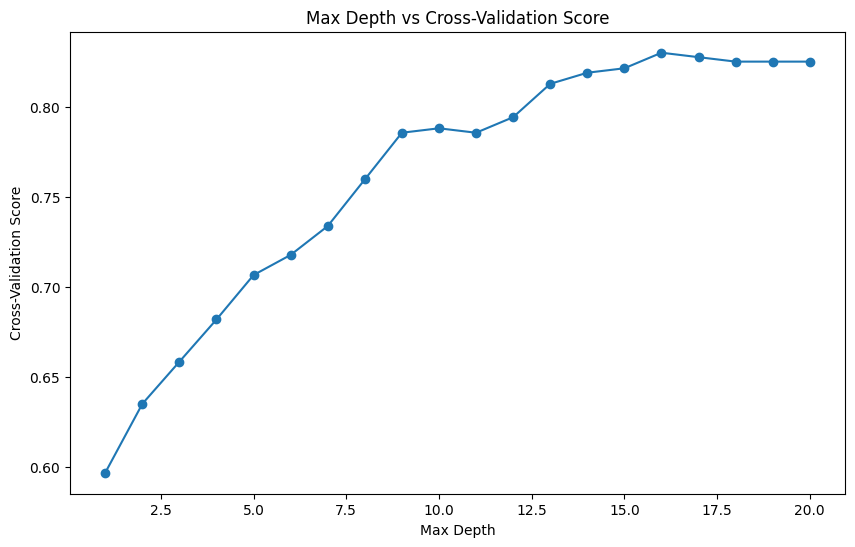

In [23]:
#Pruning: Determine max depth of the decision tree
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Define the range of max depths to evaluate
max_depths = range(1, 21)

# Initialize an empty list to store the average cross-validation scores
cv_scores = []

# Perform cross-validation for each max depth
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    cv_scores.append(np.mean(scores))

# Determine the optimal max depth based on cross-validation scores
optimal_max_depth = max_depths[np.argmax(cv_scores)]

print(f"Optimal max depth: {optimal_max_depth}")

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(max_depths, cv_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validation Score')
plt.title('Max Depth vs Cross-Validation Score')
plt.show()


In [24]:
clf = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, random_state=42)

In [25]:
#Look at parameters that are being used by the model
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [26]:
clf.predict_proba(X_test)

array([[0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.81818182, 0.18181818, 0.        ],
       [0.33333333, 0.66666667, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.81818182, 0.18181818, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.3220339 , 0.6779661 , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print a class report to have the precision, recall and f1 score in one place
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.7881773399014779

Confusion Matrix:
[[61 16  3]
 [14 59  3]
 [ 1  6 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        80
           1       0.73      0.78      0.75        76
           2       0.87      0.85      0.86        47

    accuracy                           0.79       203
   macro avg       0.80      0.80      0.80       203
weighted avg       0.79      0.79      0.79       203



In [28]:
feature_names = X.columns
feature_names

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')

In the next step we want to plot and visualize the decision trees. This will help understand the data better and analyse the models performance.

In [29]:
!pip install seaborn matplotlib graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz


#### Pair Plot
A pair plot allows us to visualize the relationships between all pairs of features and how they relate to the target variable RiskLevel. This helps in understanding the distribution and interactions of the features.

 This plot will display scatter plots for each pair of features and the distribution of each feature colored by the RiskLevel. This helps in identifying any patterns or correlations between features and the target variable.

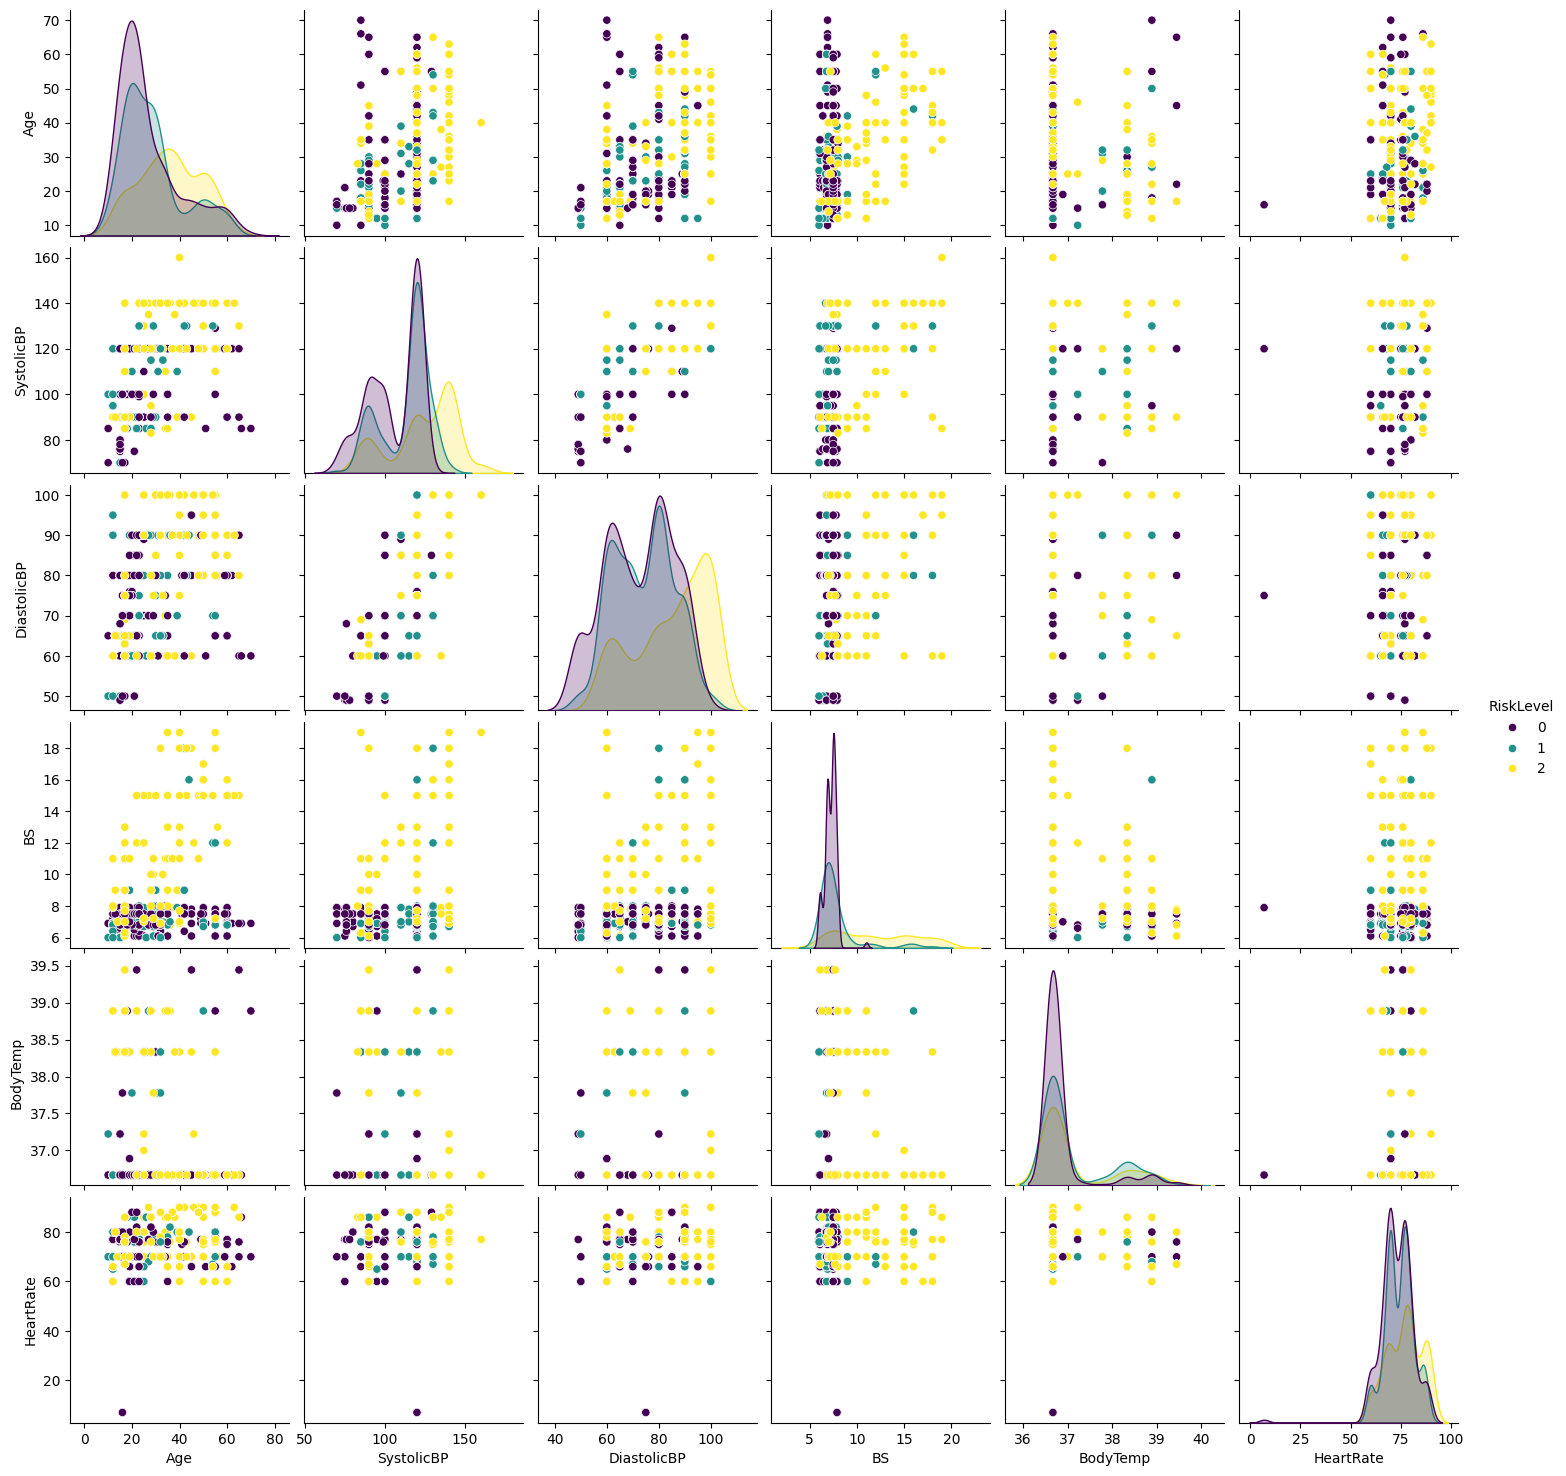

In [30]:
# Pair plot
sns.pairplot(raw_data, hue='RiskLevel', palette='viridis')
plt.show()


#### Correlation Heatmap
A correlation heatmap shows the correlation coefficients between different features. This indicates how changes in one feature are associated with changes in another feature. Strong correlations can indicate multicollinearity which might need to be addressed.

The heatmap will provide insights into which features are correlated and the strength of those correlations. This helps in understanding the underlying structure of the data.



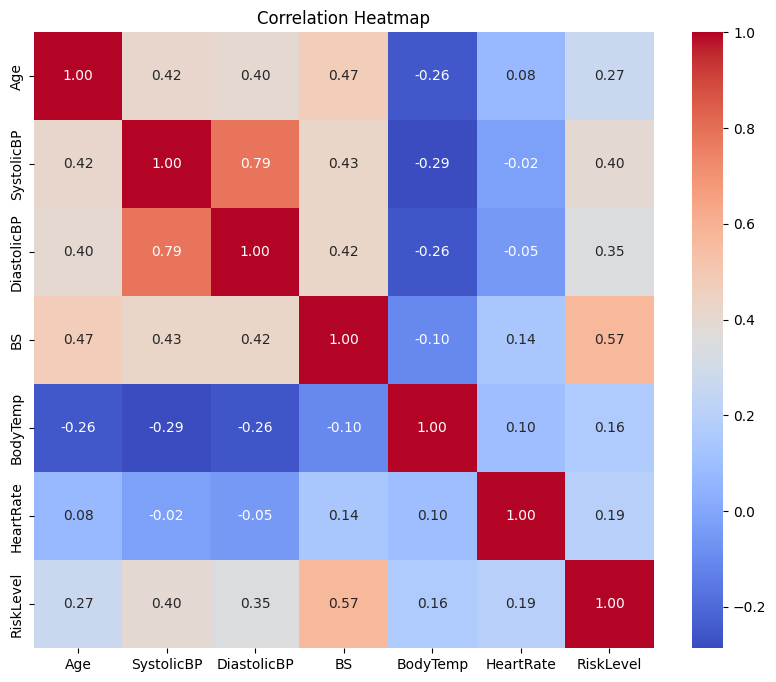

In [31]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(raw_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#### Feature importance
Feature importance visualization shows how important each feature is for the decision tree in making predictions. This helps in understanding which features contribute the most to the model’s decisions.

The bar plot of feature importance helps identify which features have the most influence on the model's predictions. This can be useful for feature selection and understanding the model.

<ipython-input-45-5df47981d55b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='plasma')


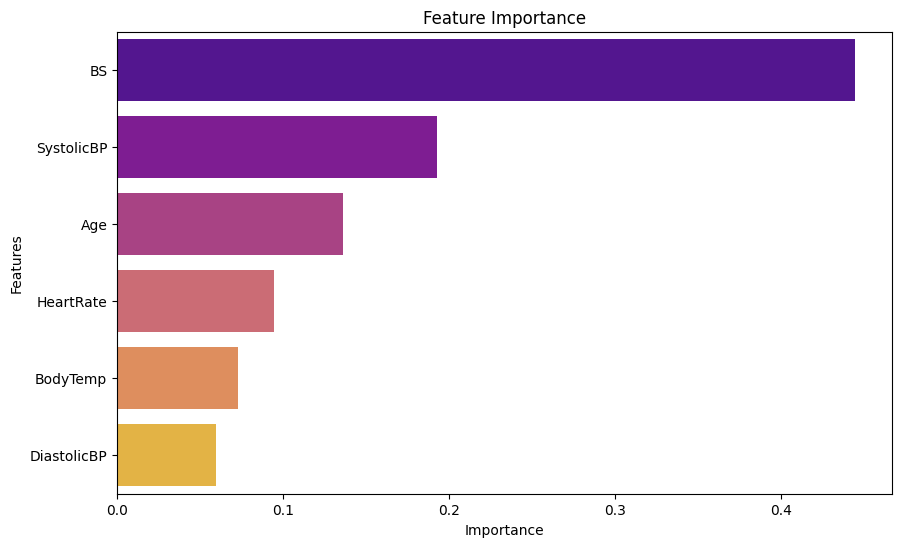

In [45]:
# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='plasma')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


####Confusion Matrix
A confusion matrix shows the actual vs. predicted classifications, which is useful for understanding the performance of the classification model. It highlights where the model is making correct predictions and where it is making errors.

The heatmap of the confusion matrix provides a visual summary of the classification results, showing the number of correct and incorrect predictions for each class.

In [34]:
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


NameError: name 'label_encoder' is not defined

<Figure size 800x600 with 0 Axes>

#### Decision Tree Visualization
Visualizing the decision tree itself provides insights into how the model makes decisions based on feature splits. This can help in understanding the model's logic and identifying any potential overfitting.

This generates a visual representation of the decision tree, illustrating the splits based on feature values and the corresponding decisions made at each node. This helps in interpreting the model and explaining its behavior.

In [ ]:
# Ensure class names are strings
class_names = list(map(str, label_encoder.classes_))

# Decision tree visualization
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph


## Random Forest

Random Forest is an ensemble-based machine learning algorithm that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. It mitigates the overfitting problem of individual decision trees and improves generalization by combining the predictions of multiple trees. This makes it a robust and accurate model, especially suited for complex datasets.

We decided to use Random Forest alongside Decision Tree to leverage its ability to reduce variance and prevent overfitting, providing more reliable predictions for our maternal health risk classification problem.

### Model Training and Evaluation

In [35]:
#scaled_data

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.81

Confusion Matrix:
[[61 16  3]
 [ 9 64  3]
 [ 1  6 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        80
           1       0.74      0.84      0.79        76
           2       0.87      0.85      0.86        47

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



#### Interpretation


**Accuracy: 0.81**

The overall accuracy of the Random Forest model is 0.81, meaning that 81% of the predictions made by the model are correct.

**Confusion Matrix:**

The confusion matrix provides a detailed breakdown of the model's predictions:

Class 0 (Low Risk):
   
   - Correctly predicted: 61
   - Incorrectly predicted as Class 1: 16
   - Incorrectly predicted as Class 2: 3

Class 1 (Mid Risk):

  - Correctly predicted: 64
  - Incorrectly predicted as Class 0: 9
  - Incorrectly predicted as Class 2: 3

Class 2 (High Risk):
        
  - Correctly predicted: 40
  - Incorrectly predicted as Class 0: 1
  - Incorrectly predicted as Class 1: 6


**Classification Report:**

Class 0 (Low Risk):

- Precision: 0.86 (Of all instances predicted as low risk, 86% are actually low risk.)
- Recall: 0.76 (Of all actual low risk instances, 76% are correctly identified.)
- F1-Score: 0.81 (Harmonic mean of precision and recall.)

Class 1 (Mid Risk):

- Precision: 0.74 (Of all instances predicted as mid risk, 74% are actually mid risk.)
- Recall: 0.84 (Of all actual mid risk instances, 84% are correctly identified.)
- F1-Score: 0.79 (Harmonic mean of precision and recall.)

Class 2 (High Risk):

- Precision: 0.87 (Of all instances predicted as high risk, 87% are actually high risk.)
- Recall: 0.85 (Of all actual high risk instances, 85% are correctly identified.)
- F1-Score: 0.86 (Harmonic mean of precision and recall.)

**Summary:**

The Random Forest model shows strong performance, particularly for high-risk cases (Class 2) with high precision (0.87) and recall (0.85). The model is slightly less effective for low-risk cases (Class 0), with a recall of 0.76, indicating some low-risk cases are misclassified. Mid-risk cases (Class 1) have good recall (0.84) but lower precision (0.74), meaning there are more false positives. Overall, the model provides a balanced and accurate classification across all risk levels, with an overall accuracy of 0.81.

### Feature Importance




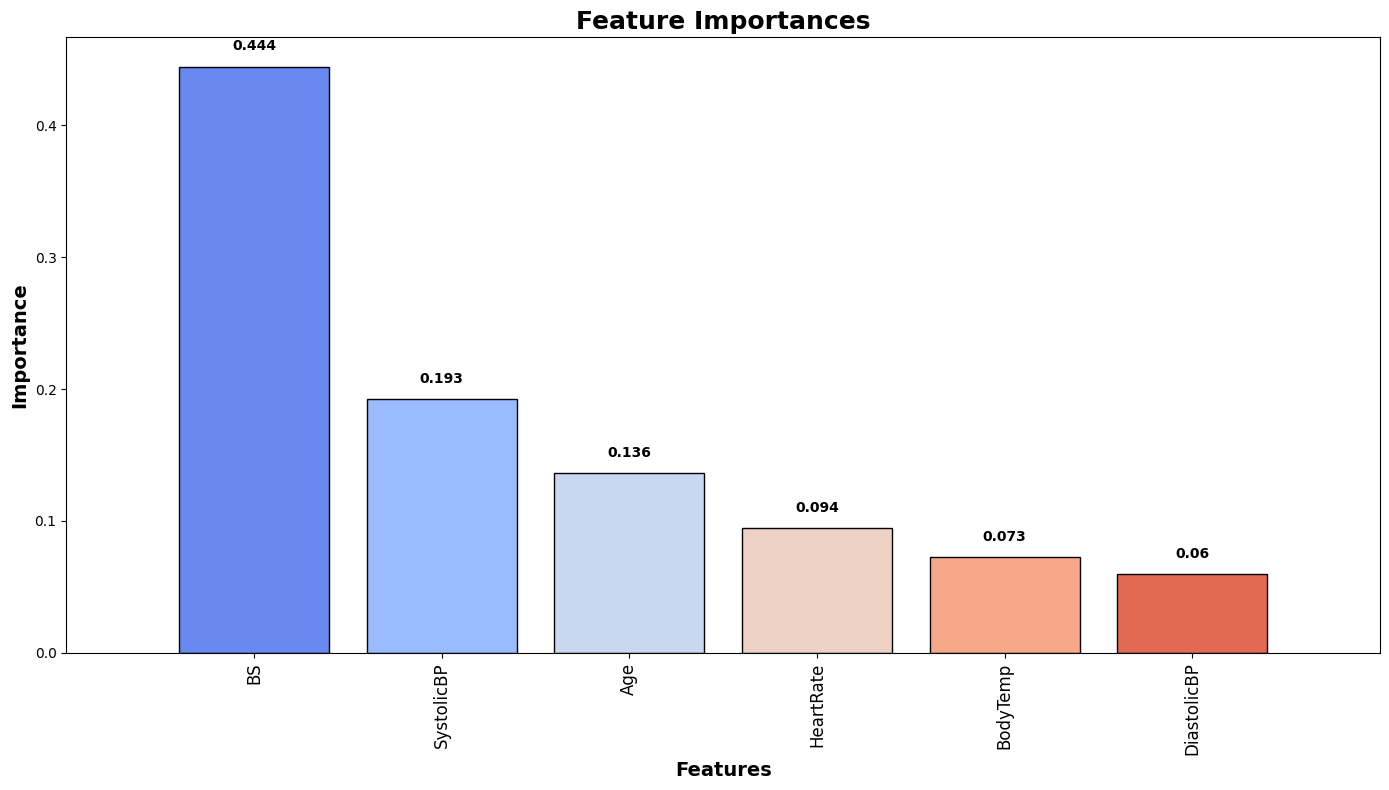

In [50]:
# Assuming feature_importances is a Series with feature names as index
# Sort the feature importances in descending order
feature_importances.sort_values(ascending=False, inplace=True)

palette = sns.color_palette("coolwarm", len(feature_importances))
plt.figure(figsize=(14, 8))
plt.title("Feature Importances", fontsize=18, fontweight='bold')
bars = plt.bar(range(len(feature_importances)), feature_importances, color=palette, edgecolor='black', align="center")
plt.xticks(range(len(feature_importances)), feature_importances.index, rotation=90, fontsize=12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set plot limits and labels
plt.xlim([-1, len(feature_importances)])
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Importance', fontsize=14, fontweight='bold')
plt.tight_layout()

plt.show()

The feature importance plot shows that BS (Blood Sugar) and SystolicBP (Systolic Blood Pressure) are the most influential features in predicting maternal health risk.

### Confusion Matrix Visualization

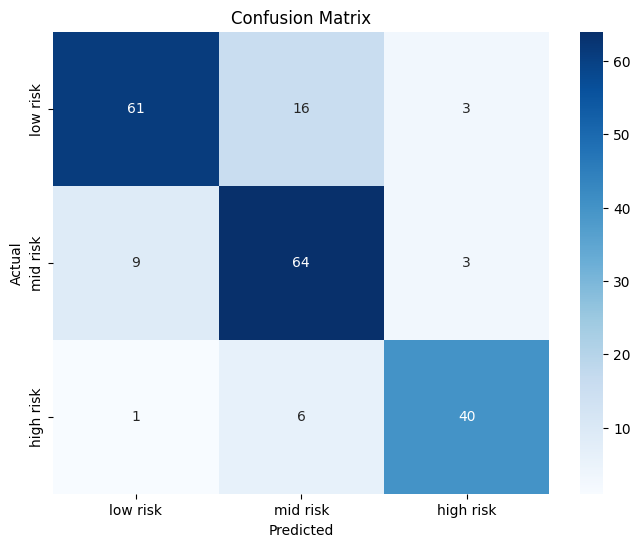

In [39]:
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['low risk', 'mid risk', 'high risk'], yticklabels=['low risk', 'mid risk', 'high risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix heatmap provides a visual summary of the classification results, showing the number of correct and incorrect predictions for each class.

### ROC Curve

In [40]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curves
def plot_roc_curves(model, X_test, y_test, title):
    plt.figure(figsize=(10, 8))
    for i in range(3):  # assuming 3 classes
        fpr, tpr, _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

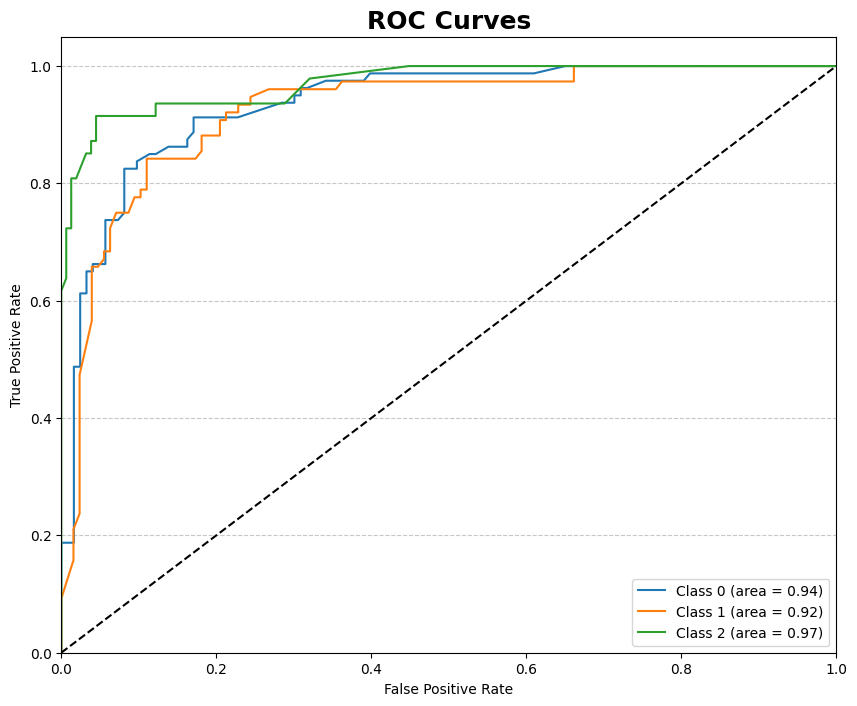

In [41]:
# ROC Curve
plot_roc_curves(rf_model, X_test, y_test, 'ROC Curves')

The ROC curves show the trade-off between sensitivity (recall) and specificity for each class. The area under the curve (AUC) values indicate that the model performs well in distinguishing between the different risk levels.

### Precision-Recall Curve

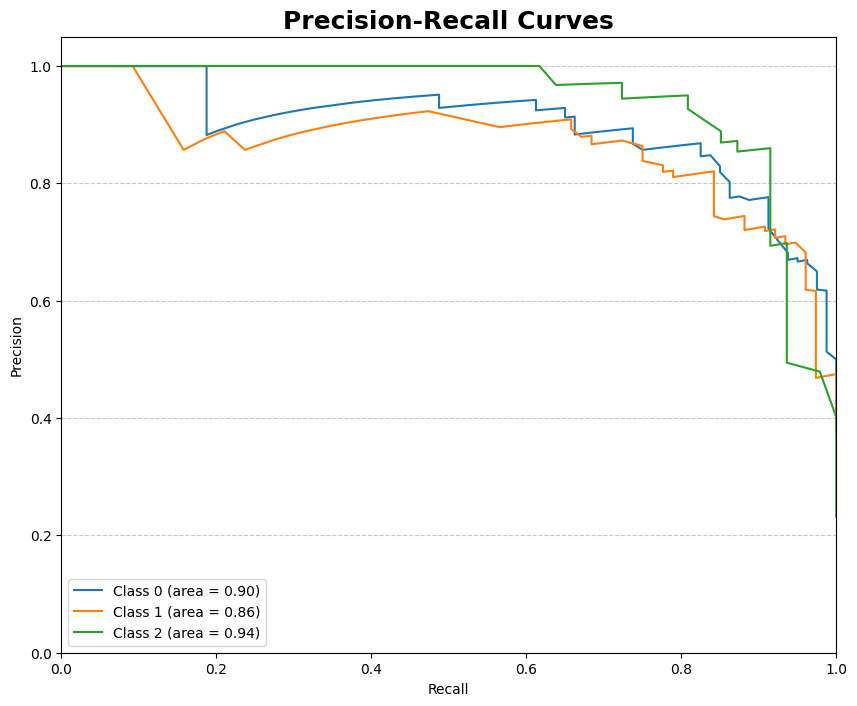

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to plot Precision-Recall curves
def plot_precision_recall_curves(model, X_test, y_test, title):
    plt.figure(figsize=(10, 8))
    for i in range(3):  # assuming 3 classes
        precision, recall, _ = precision_recall_curve(y_test == i, model.predict_proba(X_test)[:, i])
        avg_precision = average_precision_score(y_test == i, model.predict_proba(X_test)[:, i])
        plt.plot(recall, precision, label=f'Class {i} (area = {avg_precision:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.legend(loc="lower left")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Precision-Recall Curve
plot_precision_recall_curves(rf_model, X_test, y_test, 'Precision-Recall Curves')

The Precision-Recall curves provide a more detailed analysis of the model's performance for each class, particularly useful when dealing with imbalanced datasets. The curves show that the model maintains a good balance between precision and recall for all classes.

**Total Summary:**
The Random Forest model shows strong performance, particularly for high-risk cases (Class 2) with high precision (0.87) and recall (0.85). The model is slightly less effective for low-risk cases (Class 0), with a recall of 0.76, indicating some low-risk cases are misclassified. Mid-risk cases (Class 1) have good recall (0.84) but lower precision (0.74), meaning there are more false positives. Overall, the model provides a balanced and accurate classification across all risk levels, with an overall accuracy of 0.81.

## **Gradient Boosting**

After evaluating the performance of decision tree and random forest models for the classification of maternal health risk, we have decided to proceed with more advanced modeling techniques. While the initial models provided a foundational understanding of the data, their performance metrics indicated room for improvement. Advanced models, such as gradient boosting offer the potential to capture complex patterns and interactions within the data more effectively. This step aims to enhance prediction accuracy and robustness, ultimately leading to more reliable and actionable insights for maternal health risk assessment.

### Baseline Model

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialize the gradient boosting classifier
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7389162561576355
Confusion Matrix:
 [[59 16  5]
 [19 52  5]
 [ 4  4 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        80
           1       0.72      0.68      0.70        76
           2       0.80      0.83      0.81        47

    accuracy                           0.74       203
   macro avg       0.75      0.75      0.75       203
weighted avg       0.74      0.74      0.74       203



**Accuracy: 0.7389**

The overall accuracy of the Gradient Boosting model is 0.7389, meaning that approximately 73.89% of the predictions made by the model are correct.

**Confusion Matrix:**

Class 0 (Low Risk):

- Correctly predicted: 59

- Incorrectly predicted as Class 1: 16

- Incorrectly predicted as Class 2: 5

Class 1 (Mid Risk):

- Correctly predicted: 52
- Incorrectly predicted as Class 0: 19
- Incorrectly predicted as Class 2: 5

Class 2 (High Risk):

- Correctly predicted: 39
- Incorrectly predicted as Class 0: 4
- Incorrectly predicted as Class 1: 4

**Classification Report:**

Class 0 (Low Risk):

- Precision: 0.72 (Of all instances predicted as low risk, 72% are actually low risk.)

- Recall: 0.74 (Of all actual low risk instances, 74% are correctly identified.)

- F1-Score: 0.73 (Harmonic mean of precision and recall.)

Class 1 (Mid Risk):

- Precision: 0.72 (Of all instances predicted as mid risk, 72% are actually mid risk.)

- Recall: 0.68 (Of all actual mid risk instances, 68% are correctly identified.)

- F1-Score: 0.70 (Harmonic mean of precision and recall.)

Class 2 (High Risk):

- Precision: 0.80 (Of all instances predicted as high risk, 80% are actually high risk.)

- Recall: 0.83 (Of all actual high risk instances, 83% are correctly identified.)

- F1-Score: 0.81 (Harmonic mean of precision and recall.)

**Summary:**

The Gradient Boosting model demonstrates solid performance with an overall accuracy of approximately 74%. It performs particularly well for high-risk cases (Class 2) with high precision (0.80) and recall (0.83), indicating a strong ability to identify true positives while minimizing false positives. The model is also reasonably effective for low-risk cases (Class 0), with a precision of 0.72 and recall of 0.74, reflecting a balanced performance.

However, for mid-risk cases (Class 1), the model has slightly lower recall (0.68), meaning it misses some actual positives. The precision for mid-risk cases is 0.72, showing that there are some false positives.

Overall, the model provides a balanced and accurate classification across all risk levels, with room for further improvement, particularly in enhancing the recall for mid-risk cases. Further steps could include hyperparameter tuning, additional feature engineering, or exploring different model architectures to boost performance.

#### Feature Importance

Model fitted: True


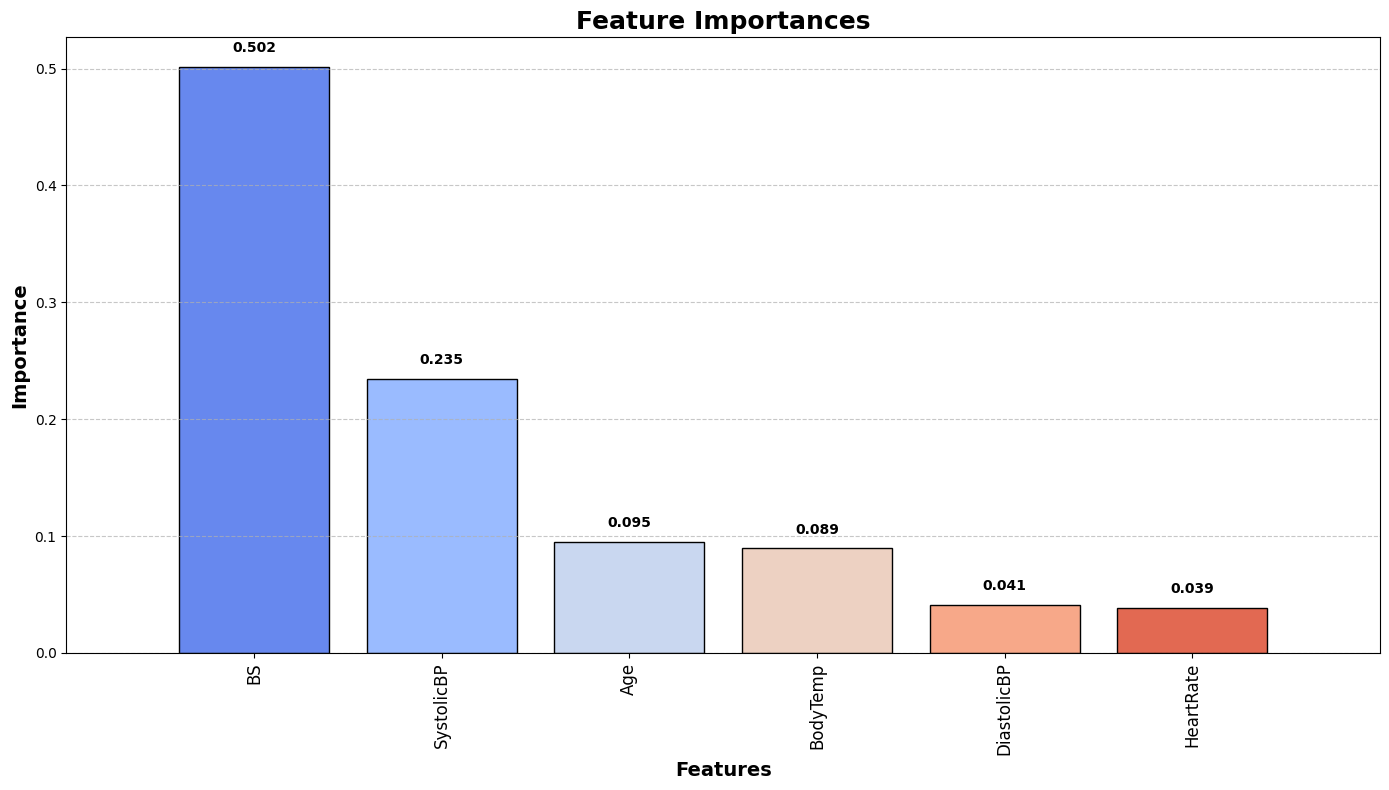

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Verify if the model is fitted
is_fitted = hasattr(gb_model, "feature_importances_")
print(f"Model fitted: {is_fitted}")

if is_fitted:
    # Get feature importances
    feature_importances = gb_model.feature_importances_

    # Get feature names
    feature_names = X.columns

    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]

    # Create a color palette
    palette = sns.color_palette("coolwarm", len(feature_importances))

    # Plot the feature importances
    plt.figure(figsize=(14, 8))
    plt.title("Feature Importances", fontsize=18, fontweight='bold')
    bars = plt.bar(range(X.shape[1]), feature_importances[indices], color=palette, edgecolor='black', align="center")
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90, fontsize=12)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel('Features', fontsize=14, fontweight='bold')
    plt.ylabel('Importance', fontsize=14, fontweight='bold')
    plt.tight_layout()

    # Adding value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The model is not fitted properly.")



Blood Sugar (BS) is the most influential feature, with an importance score of 0.502. This indicates that blood sugar levels play a critical role in determining maternal health risk, potentially overshadowing other factors.
Systolic Blood Pressure (SystolicBP) ranks second in importance, with a score of 0.235. This suggests that systolic blood pressure is also a significant predictor of maternal health risk.
Age and Body Temperature (BodyTemp) follow with importance scores of 0.095 and 0.089, respectively, indicating moderate influence on the prediction outcomes.
Diastolic Blood Pressure (DiastolicBP) and Heart Rate have lower importance scores of 0.041 and 0.038, respectively, suggesting they contribute less to the model compared to the other features.
Overall, the model highlights that blood sugar and systolic blood pressure are the most critical factors in assessing maternal health risk, emphasizing the need to closely monitor these parameters.

#### Confusion Matrix

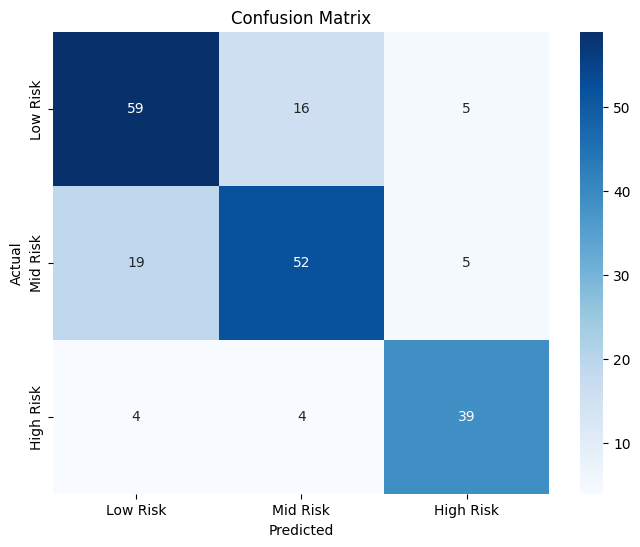

In [ ]:
# Generate the confusion matrix based on the provided output
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Low Risk', 'Mid Risk', 'High Risk']

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Cross Validation

We apply cross-validation to achieve a more robust and reliable evaluation of our Gradient Boosting model. By using cross-validation, we ensure that our model is evaluated on diverse subsets of data, leading to a comprehensive understanding of its performance and helping to avoid potential overfitting. This method enhances the credibility of our results and supports the development of a highly accurate and generalizable predictive model.

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.81280788 0.62068966 0.71428571 0.75862069 0.7970297 ]
Mean CV Score: 0.7406867287713993


The cross-validation scores indicate how well our model performs across different splits of the dataset. The scores range from about 0.63 to 0.81, with a mean cross-validation score of approximately 0.74. This variability suggests that while our model generally performs well, there are some splits where the performance could be improved, which is why we will implement different improvement strategies in the following sections.

### Hyperparameter Tuning

To determine the best hyperparameters for our Gradient Boosting model, we are applying and comparing two optimization methods: Grid Search and Bayesian Optimization.


#### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the gradient boosting classifier
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.8311217147617965
Accuracy: 0.8177339901477833
Confusion Matrix:
 [[64 11  5]
 [11 62  3]
 [ 2  5 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82        80
           1       0.79      0.82      0.81        76
           2       0.83      0.85      0.84        47

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



The process of tuning hyperparameters with Grid Search involved fitting 5-fold cross-validation for each of 243 candidate hyperparameter combinations, resulting in a total of 1,215 fits. The Grid Search identified the best hyperparameters as follows: learning_rate of 0.1, max_depth of 5, min_samples_leaf of 1, min_samples_split of 5, and n_estimators of 200. The best cross-validation score achieved was 0.8311.

Evaluating the model on the test data, we obtained an accuracy of 81.77%. The confusion matrix showed 64 correct predictions for low risk, 62 for mid risk, and 40 for high risk, with corresponding precision, recall, and F1-scores of 0.83, 0.80, and 0.82 for low risk, 0.79, 0.82, and 0.81 for mid risk, and 0.83, 0.85, and 0.84 for high risk, respectively.

Overall, the model achieved a balanced performance across all classes with a macro and weighted average F1-score of 0.82, indicating robust and reliable predictions for maternal health risks.







#### Bayesian Optimization

In [ ]:
# Install scikit-optimize
!pip install scikit-optimize

from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming raw_data is already loaded and preprocessed

# Define features and target variable
X = data_scaled.drop(columns=['RiskLevel'])
y = data_scaled['RiskLevel']

# Split the data into training and testing sets with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter space for Bayesian Optimization
param_space = {
    'n_estimators': (100, 500),
    'learning_rate': (0.01, 0.2),
    'max_depth': (3, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

# Initialize the Bayesian search
bayes_search = BayesSearchCV(estimator=GradientBoostingClassifier(random_state=42), search_spaces=param_space, n_iter=32, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
bayes_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", bayes_search.best_params_)
print("Best Score:", bayes_search.best_score_)

# Use the best estimator to make predictions
best_gb_model = bayes_search.best_estimator_
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)




Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Using Bayesian optimization, we fine-tuned the hyperparameters of our Gradient Boosting model to enhance its predictive performance for maternal health risk classification. The optimization process identified the best parameters: learning_rate of 0.127, max_depth of 9, min_samples_leaf of 4, min_samples_split of 8, and n_estimators of 238. The optimized model achieved an accuracy of 83.74%, indicating a high level of predictive performance.


**Hyperparameter Tuning Summary:** The Grid Search method identified optimal parameters yielding a test accuracy of 81.77%, while Bayesian Optimization achieved a slightly higher accuracy of 83.74%. Bayesian Optimization also provided better precision for the low-risk class (Class 0) and balanced performance across all classes. Based on these results, we selected the Bayesian Optimization approach for its superior accuracy and class-specific performance, enhancing the model's ability to predict maternal health risks accurately and reliably.

### (Bayesian) Tuned Model

Accuracy: 0.8374384236453202
Confusion Matrix:
 [[64 10  6]
 [ 7 66  3]
 [ 1  6 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        80
           1       0.80      0.87      0.84        76
           2       0.82      0.85      0.83        47

    accuracy                           0.84       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203



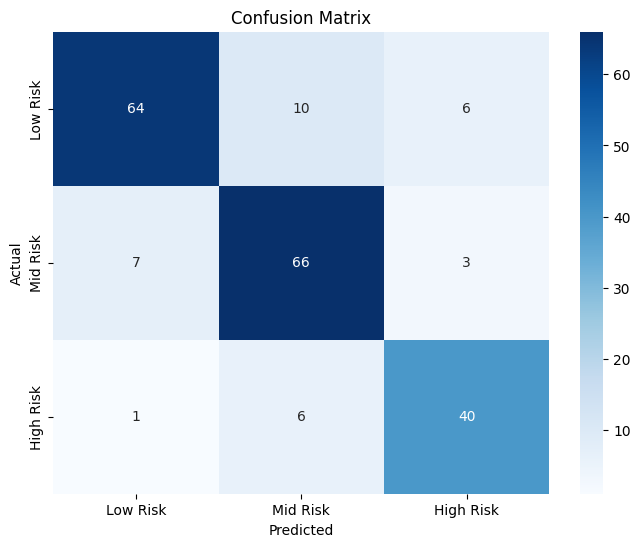

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_scaled.drop(columns=['RiskLevel'])
y = data_scaled['RiskLevel']

# Split the data into training and testing sets with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best parameters from Bayesian optimization
best_params = {
    'learning_rate': 0.12688548845044417,
    'max_depth': 9,
    'min_samples_leaf': 4,
    'min_samples_split': 8,
    'n_estimators': 238,
    'random_state': 42
}

# Initialize the gradient boosting classifier with the best parameters
gb_model = GradientBoostingClassifier(**best_params)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels
class_labels = ['Low Risk', 'Mid Risk', 'High Risk']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Accuracy:**
The tuned model achieved an accuracy of 83.74%, indicating that approximately 83.74% of the predictions made by the model are correct.

**Confusion Matrix:**

- Class 0 (Low Risk): 64 correctly predicted, 10 incorrectly predicted as Mid Risk, and 6 incorrectly predicted as High Risk.

- Class 1 (Mid Risk): 66 correctly predicted, 7 incorrectly predicted as Low Risk, and 3 incorrectly predicted as High Risk.

- Class 2 (High Risk): 40 correctly predicted, 1 incorrectly predicted as Low Risk, and 6 incorrectly predicted as Mid Risk.

**Classification Report:**

Class 0 (Low Risk):

- Precision: 0.89 (Of all instances predicted as low risk, 89% are actually low risk.)

- Recall: 0.80 (Of all actual low risk instances, 80% are correctly identified.)

- F1-Score: 0.84 (Harmonic mean of precision and recall.)

Class 1 (Mid Risk):

- Precision: 0.80 (Of all instances predicted as mid risk, 80% are actually mid risk.)

- Recall: 0.87 (Of all actual mid risk instances, 87% are correctly identified.)

- F1-Score: 0.84 (Harmonic mean of precision and recall.)

Class 2 (High Risk):

- Precision: 0.82 (Of all instances predicted as high risk, 82% are actually high risk.)

- Recall: 0.85 (Of all actual high risk instances, 85% are correctly identified.)

- F1-Score: 0.83 (Harmonic mean of precision and recall.)

Summary:

The Bayesian-optimized Gradient Boosting model demonstrates a high level of predictive performance with an overall accuracy of 83.74%. It shows balanced precision, recall, and F1-scores across all classes, indicating that the model performs well in distinguishing between different maternal health risk levels. This balanced performance is critical in clinical applications, where accurate identification of all risk levels is essential. The results from Bayesian optimization underscore the importance of hyperparameter tuning in enhancing model performance, providing reliable and accurate predictions for maternal health risks.

####**Feature Importance**

Model fitted: True


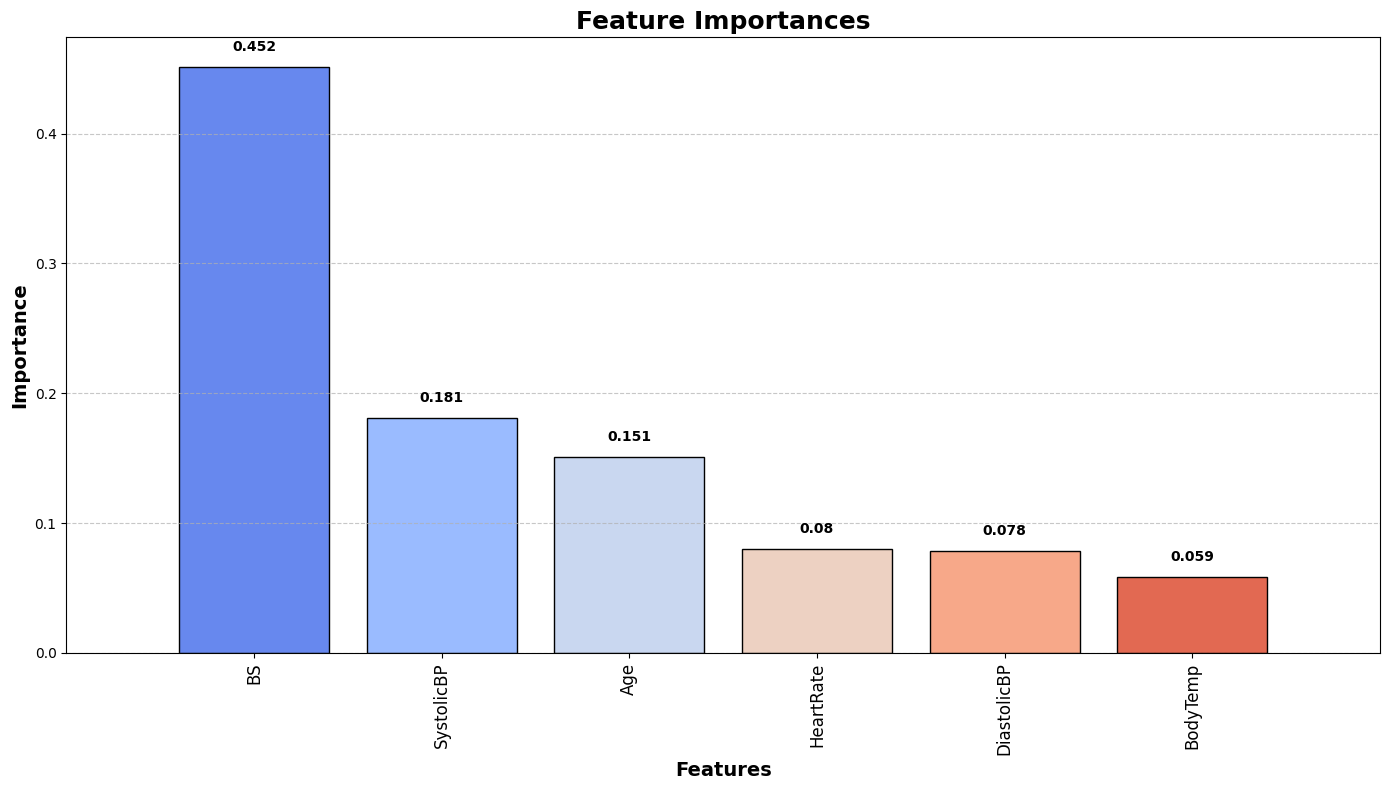

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Verify if the model is fitted
is_fitted = hasattr(gb_model, "feature_importances_")
print(f"Model fitted: {is_fitted}")

if is_fitted:
    # Get feature importances
    feature_importances = gb_model.feature_importances_

    # Get feature names
    feature_names = X.columns

    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]

    # Create a color palette
    palette = sns.color_palette("coolwarm", len(feature_importances))

    # Plot the feature importances
    plt.figure(figsize=(14, 8))
    plt.title("Feature Importances", fontsize=18, fontweight='bold')
    bars = plt.bar(range(X.shape[1]), feature_importances[indices], color=palette, edgecolor='black', align="center")
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90, fontsize=12)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel('Features', fontsize=14, fontweight='bold')
    plt.ylabel('Importance', fontsize=14, fontweight='bold')
    plt.tight_layout()

    # Adding value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The model is not fitted properly.")


#### **ROC**

The ROC (Receiver Operating Characteristic) curve is a graphical representation that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. Here, we have the ROC curves for a multi-class classification problem with three classes (0, 1, and 2).

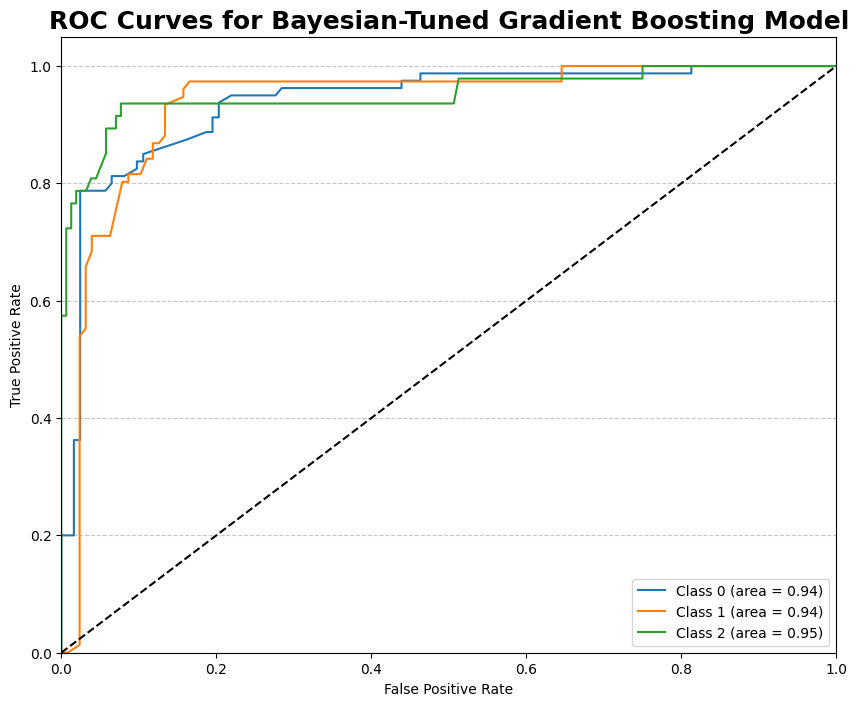

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curves
def plot_roc_curves(model, X_test, y_test, title):
    plt.figure(figsize=(10, 8))
    for i in range(3):  # assuming 3 classes
        fpr, tpr, _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot ROC curves for the Bayesian-tuned model
plot_roc_curves(gb_model, X_test, y_test, 'ROC Curves for Bayesian-Tuned Gradient Boosting Model')


The AUC values for all three classes are high (0.94 for Classes 0 and 1, and 0.95 for Class 2). This indicates that the model performs very well in distinguishing between the different classes.
The ROC curves for all classes show that the model has a balanced performance, with similar high AUC values across the classes.

#### Precision-Recall Curve

The Precision-Recall (PR) curve is a graphical representation that illustrates the trade-off between precision and recall for different threshold settings of a binary classifier. In this plot, we have PR curves for a multi-class classification problem with three classes (0, 1, and 2).

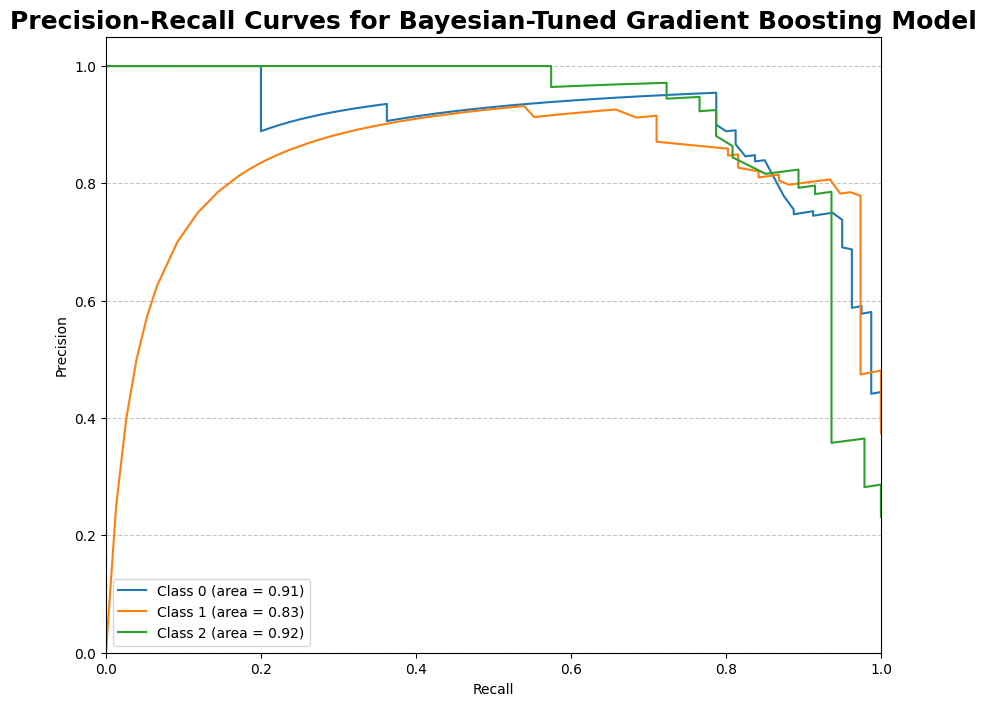

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to plot Precision-Recall curves
def plot_precision_recall_curves(model, X_test, y_test, title):
    plt.figure(figsize=(10, 8))
    for i in range(3):  # assuming 3 classes
        precision, recall, _ = precision_recall_curve(y_test == i, model.predict_proba(X_test)[:, i])
        avg_precision = average_precision_score(y_test == i, model.predict_proba(X_test)[:, i])
        plt.plot(recall, precision, label=f'Class {i} (area = {avg_precision:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.legend(loc="lower left")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Precision-Recall Curve for the Bayesian-tuned model
plot_precision_recall_curves(gb_model, X_test, y_test, 'Precision-Recall Curves for Bayesian-Tuned Gradient Boosting Model')


**Class 0 (Low Risk):**

Area Under Curve (AUC): 0.91

Interpretation: The high AUC indicates that the model has a high precision and recall for the low-risk class. This means the model is very effective in identifying low-risk instances correctly, with few false positives and false negatives.

**Class 1 (Mid Risk):**

Area Under Curve (AUC): 0.83

Interpretation: The AUC for the mid-risk class is slightly lower than for low and high-risk classes, indicating a moderate level of precision and recall. The model is reasonably good at identifying mid-risk instances, but there is a higher trade-off between precision and recall compared to the other classes.

**Class 2 (High Risk):**

Area Under Curve (AUC): 0.92

Interpretation: The high AUC for the high-risk class indicates excellent precision and recall. The model is very effective at identifying high-risk instances correctly, with minimal false positives and false negatives.

**Summary:**

The Precision-Recall curves show that the Bayesian-tuned Gradient Boosting model performs exceptionally well for both the low-risk and high-risk classes, with AUC values of 0.91 and 0.92 respectively. This indicates that the model can reliably distinguish these classes with high precision and recall.

The performance for the mid-risk class is also strong, but with a slightly lower AUC of 0.83, suggesting a moderate trade-off between precision and recall for this class.

High precision and recall are crucial in clinical settings to minimize false positives and false negatives, especially for high-risk cases where timely and accurate identification can significantly impact patient outcomes. The high AUC values for low and high-risk classes underscore the model's reliability and effectiveness in predicting maternal health risks.

#### K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Best parameters from Bayesian optimization
best_params = {
    'learning_rate': 0.12688548845044417,
    'max_depth': 9,
    'min_samples_leaf': 4,
    'min_samples_split': 8,
    'n_estimators': 238,
    'random_state': 42
}

# Initialize the gradient boosting classifier with the best parameters
gb_model = GradientBoostingClassifier(**best_params)

# Perform k-fold cross-validation
k = 5
cv_scores = cross_val_score(gb_model, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores
print(f"{k}-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


5-Fold Cross-Validation Scores: [0.89655172 0.73399015 0.77832512 0.8226601  0.87623762]
Mean CV Score: 0.8215529434716873


The cross-validation scores vary from 0.7339 to 0.8966. This variability suggests that the model performs well on some folds but less so on others, indicating potential variability in model performance depending on the specific data subset.

The model achieved high accuracy in folds 1, 4, and 5 (above 0.82), which demonstrates that the model is generally capable of making accurate predictions. These high scores indicate that the model has strong predictive power when the training data is representative of the test data.

Fold 2 has a noticeably lower accuracy score of 0.7339. This might suggest that the specific subset of data used in this fold had characteristics that were more challenging for the model to handle. It could also indicate areas where the model may need improvement, such as handling certain types of data variability or noise.

The mean cross-validation score is 0.8216. This average indicates that, on the whole, the model performs well and consistently across different subsets of the data. A mean score above 0.82 suggests that the model is robust and reliable, with a good balance between bias and variance.

#### Error Analysis

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Error Analysis
# Create a DataFrame to compare actual and predicted values
error_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
error_df['Correct'] = error_df['Actual'] == error_df['Predicted']

# Show incorrect predictions
incorrect_predictions = error_df[error_df['Correct'] == False]
print(f"Number of incorrect predictions: {len(incorrect_predictions)}")
print(incorrect_predictions)

# Detailed Error Analysis for each class
for cls in [0, 1, 2]:
    cls_errors = incorrect_predictions[incorrect_predictions['Actual'] == cls]
    print(f"\nDetailed errors for class {cls} (Number of errors: {len(cls_errors)}):")
    print(cls_errors)


Accuracy: 0.8374384236453202
Confusion Matrix:
 [[64 10  6]
 [ 7 66  3]
 [ 1  6 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        80
           1       0.80      0.87      0.84        76
           2       0.82      0.85      0.83        47

    accuracy                           0.84       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203

Number of incorrect predictions: 33
     Actual  Predicted  Correct
199       2          1    False
588       1          0    False
547       0          1    False
355       2          0    False
256       0          2    False
948       0          1    False
280       0          2    False
497       0          1    False
895       0          2    False
254       0          2    False
430       0          1    False
810       1          2    False
680       2          1    False
926       0          1    

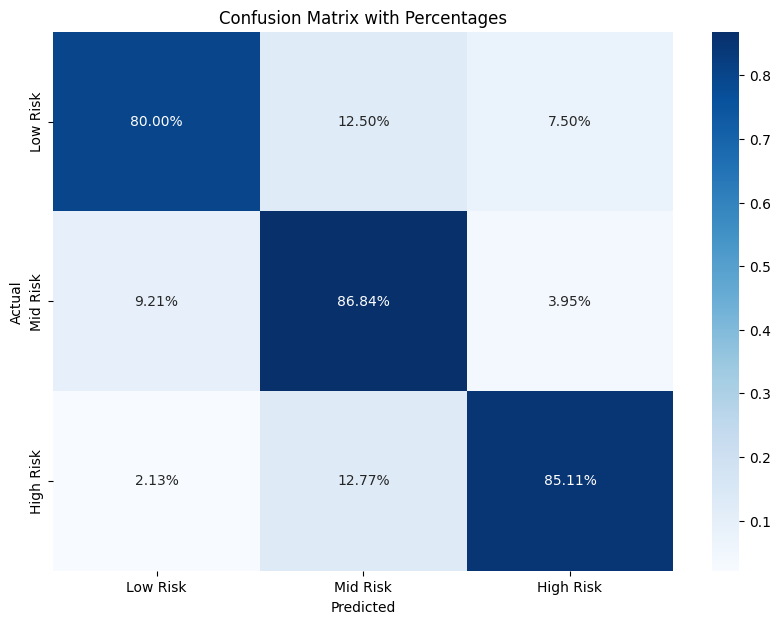

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot Confusion Matrix with percentages
plt.figure(figsize=(10, 7))
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.title('Confusion Matrix with Percentages')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Low Risk (Actual Class):**

80.00% Correctly Predicted:
The model correctly predicted 80% of the Low Risk instances.

12.50% Misclassified as Mid Risk:
12.5% of the Low Risk instances were incorrectly classified as Mid Risk.

7.50% Misclassified as High Risk:
7.5% of the Low Risk instances were incorrectly classified as High Risk.

**Mid Risk (Actual Class):**

86.84% Correctly Predicted:
The model correctly predicted 86.84% of the Mid Risk instances.

9.21% Misclassified as Low Risk:
9.21% of the Mid Risk instances were incorrectly classified as Low Risk.

3.95% Misclassified as High Risk:
3.95% of the Mid Risk instances were incorrectly classified as High Risk.

**High Risk (Actual Class):**

85.11% Correctly Predicted:
The model correctly predicted 85.11% of the High Risk instances.

12.77% Misclassified as Mid Risk:
12.77% of the High Risk instances were incorrectly classified as Mid Risk.

2.13% Misclassified as Low Risk:
2.13% of the High Risk instances were incorrectly classified as Low Risk.

**Summary**

The model demonstrates strong performance in predicting Mid Risk and High Risk categories, with correct prediction rates of 86.84% and 85.11%, respectively. However, the Low Risk category shows a slightly lower correct prediction rate of 80.00%, indicating some room for improvement.

The misclassifications predominantly occur between Low Risk and Mid Risk categories. The model incorrectly predicts Low Risk instances as Mid Risk in 12.50% of the cases and vice versa in 9.21% of the cases. This highlights that distinguishing between Low Risk and Mid Risk instances poses a challenge for the model.

The high correct prediction rates for Mid Risk and High Risk categories suggest that the model effectively identifies these risk levels. The overall balanced performance across all categories underscores the model's reliability in predicting maternal health risks. However, focusing on reducing the misclassification between Low Risk and Mid Risk categories could further enhance the model's accuracy and utility in clinical settings.

### XGBoost

Untuned:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8423645320197044
Confusion Matrix:
 [[66 10  4]
 [ 9 64  3]
 [ 1  5 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85        80
           1       0.81      0.84      0.83        76
           2       0.85      0.87      0.86        47

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203



Tuned:

Accuracy: 0.8472906403940886
Confusion Matrix:
 [[67 10  3]
 [ 9 64  3]
 [ 2  4 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        80
           1       0.82      0.84      0.83        76
           2       0.87      0.87      0.87        47

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203



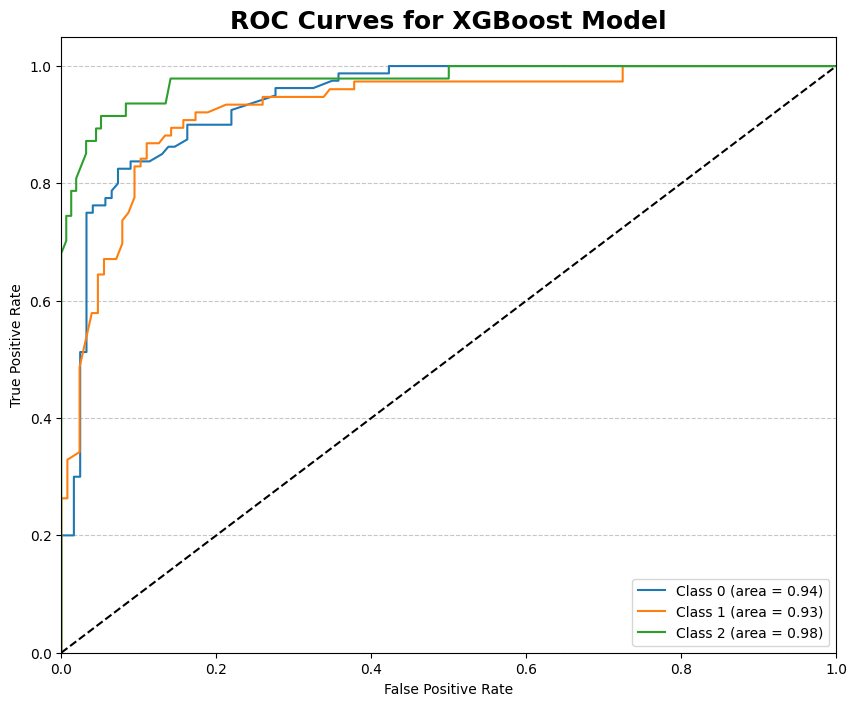

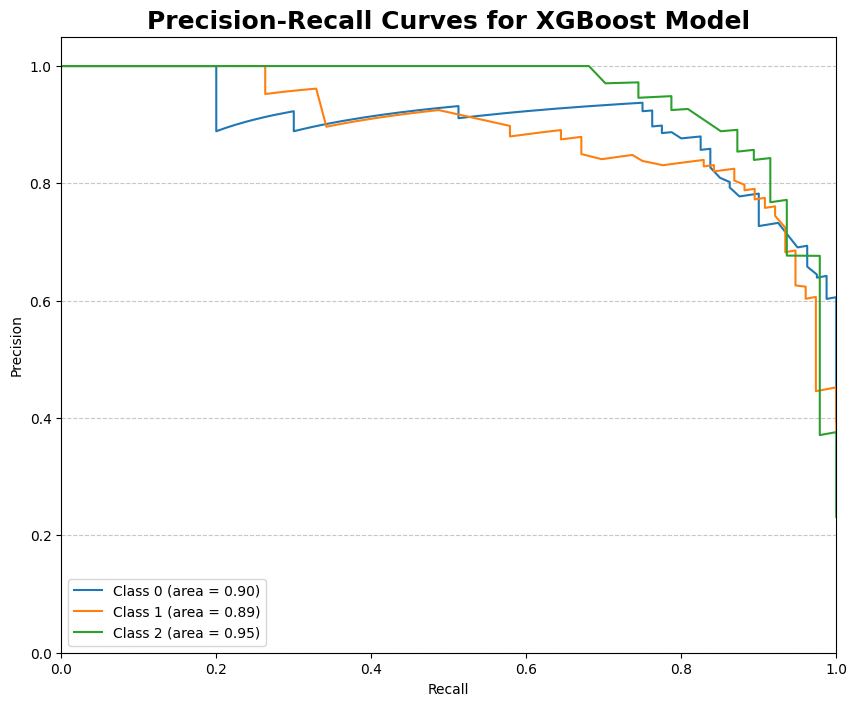

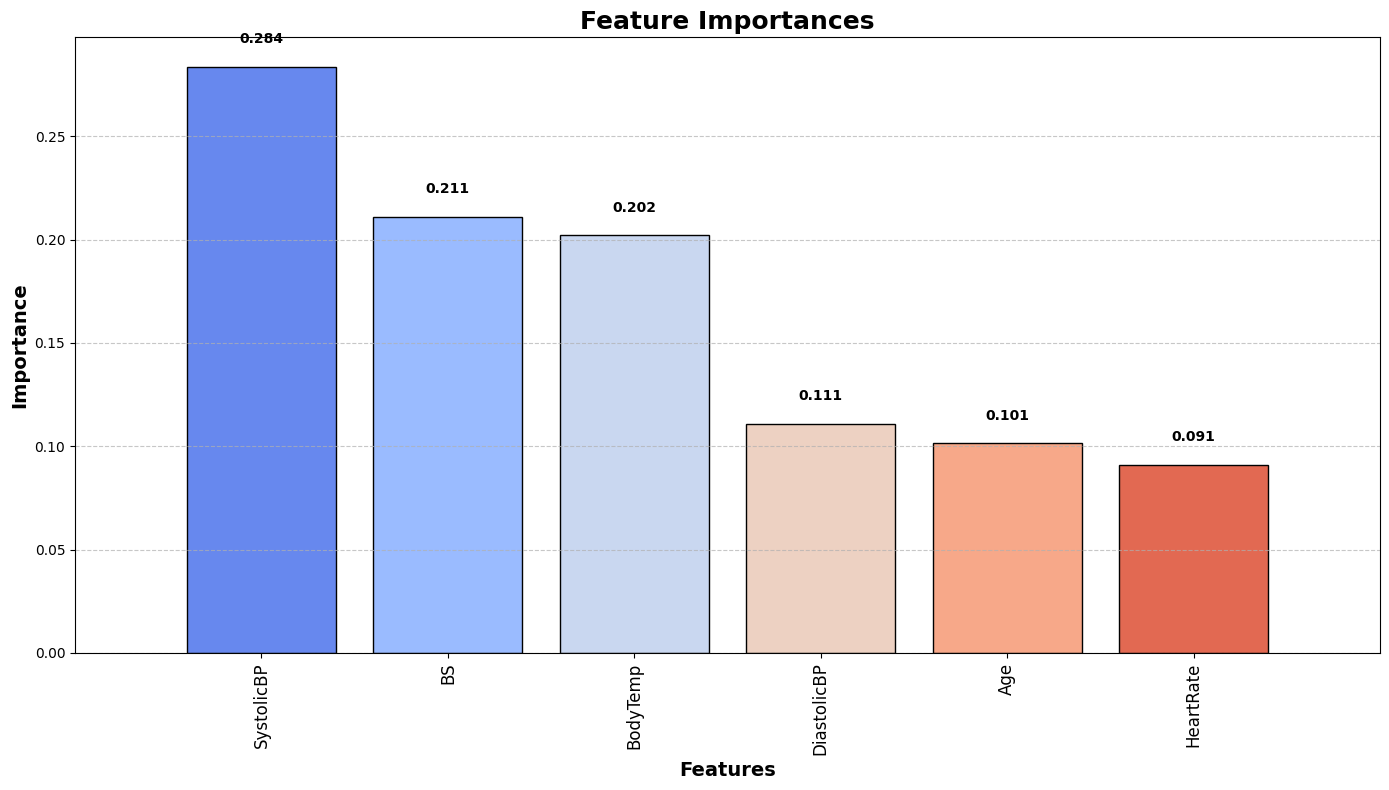

In [ ]:
# Install XGBoost
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=238,
    learning_rate=0.12688548845044417,
    max_depth=9,
    min_child_weight=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Function to plot ROC curves
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curves(model, X_test, y_test, title):
    plt.figure(figsize=(10, 8))
    for i in range(3):  # assuming 3 classes
        fpr, tpr, _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot ROC Curve
plot_roc_curves(xgb_model, X_test, y_test, 'ROC Curves for XGBoost Model')

# Function to plot Precision-Recall curves
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curves(model, X_test, y_test, title):
    plt.figure(figsize=(10, 8))
    for i in range(3):  # assuming 3 classes
        precision, recall, _ = precision_recall_curve(y_test == i, model.predict_proba(X_test)[:, i])
        avg_precision = average_precision_score(y_test == i, model.predict_proba(X_test)[:, i])
        plt.plot(recall, precision, label=f'Class {i} (area = {avg_precision:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.legend(loc="lower left")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot Precision-Recall Curve
plot_precision_recall_curves(xgb_model, X_test, y_test, 'Precision-Recall Curves for XGBoost Model')

# Feature importance plot
import numpy as np
import seaborn as sns

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Create a color palette
palette = sns.color_palette("coolwarm", len(feature_importances))

# Plot the feature importances
plt.figure(figsize=(14, 8))
plt.title("Feature Importances", fontsize=18, fontweight='bold')
bars = plt.bar(range(X.shape[1]), feature_importances[indices], color=palette, edgecolor='black', align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90, fontsize=12)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Importance', fontsize=14, fontweight='bold')
plt.tight_layout()

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Model Ensembling

In our quest to enhance the accuracy and reliability of maternal health risk classification, we are creating an ensemble model that leverages the strengths of three distinct decision tree-based models: a regular Decision Tree, Random Forest, and Gradient Boosting. Ensemble learning is a powerful machine learning technique that combines multiple models to produce a single, robust predictive model. This approach aims to reduce the variance and bias of the predictions, thus improving the overall performance and generalizability of the model.
Our ensemble model is constructed using a Voting Classifier, which combines the outputs of Decision Tree, Random Forest and Gradient Boosting.

By integrating these models, our ensemble leverages the individual strengths of each model type: the simplicity and interpretability of the Decision Tree, the robustness of the Random Forest, and the accuracy of the Gradient Boosting model. This comprehensive approach ensures that our predictive model is both accurate and reliable, making it a valuable tool for identifying maternal health risks and ultimately improving patient outcomes.

In [ ]:
# With Bayesian Tuned Parameter for GB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Decision Tree model with optimal max depth
dt_model = DecisionTreeClassifier(max_depth=17, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Gradient Boosting model with Bayesian optimized parameters
best_params = {
    'learning_rate': 0.12688548845044417,
    'max_depth': 9,
    'min_samples_leaf': 4,
    'min_samples_split': 8,
    'n_estimators': 238,
    'random_state': 42
}
gb_model = GradientBoostingClassifier(**best_params)

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('decision_tree', dt_model),
        ('random_forest', rf_model),
        ('gradient_boosting', gb_model)
    ],
    voting='soft'
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Ensemble Model Accuracy: {accuracy:.2f}')
print("\nEnsemble Model Confusion Matrix:")
print(conf_matrix)
print("\nEnsemble Model Classification Report:")
print(class_report)


Ensemble Model Accuracy: 0.83

Ensemble Model Confusion Matrix:
[[65 11  4]
 [ 9 64  3]
 [ 1  6 40]]

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        80
           1       0.79      0.84      0.82        76
           2       0.85      0.85      0.85        47

    accuracy                           0.83       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.83      0.83      0.83       203



**Overall Accuracy:** The ensemble model achieved an accuracy of 83%, meaning that 83% of the predictions made by the model are correct. This high accuracy indicates that the ensemble approach effectively leverages the strengths of each individual model to make reliable predictions.

**Confusion Matrix:**

Class 0 (Low Risk): Correctly predicted: 65; Incorrectly predicted as Mid Risk: 11; Incorrectly predicted as High Risk: 4

**Class 1 (Mid Risk):**

Correctly predicted: 64; Incorrectly predicted as Low Risk: 9; Incorrectly predicted as High Risk: 3

**Class 2 (High Risk):**

Correctly predicted: 40; Incorrectly predicted as Low Risk: 1; Incorrectly predicted as Mid Risk: 6

**Classification Report:**

**Class 0 (Low Risk):**

Precision: 0.87 (Of all instances predicted as low risk, 87% are actually low risk.)

Recall: 0.81 (Of all actual low risk instances, 81% are correctly identified.)

F1-Score: 0.84 (Harmonic mean of precision and recall.)

**Class 1 (Mid Risk):**

Precision: 0.79 (Of all instances predicted as mid risk, 79% are actually mid risk.)

Recall: 0.84 (Of all actual mid risk instances, 84% are correctly identified.)

F1-Score: 0.82 (Harmonic mean of precision and recall.)

**Class 2 (High Risk):**

Precision: 0.85 (Of all instances predicted as high risk, 85% are actually high risk.)

Recall: 0.85 (Of all actual high risk instances, 85% are correctly identified.)

F1-Score: 0.85 (Harmonic mean of precision and recall.)

**Summary:**

The ensemble model exhibits balanced performance across all classes, with precision, recall, and F1-scores consistently high for low, mid, and high-risk categories.
The model shows particularly strong performance in predicting high-risk cases (Class 2) with high precision and recall, which is crucial for clinical applications where accurate identification of high-risk patients is essential.
While the model performs well overall, there is room for improvement in the recall for low-risk cases and the precision for mid-risk cases to further reduce false positives and false negatives.

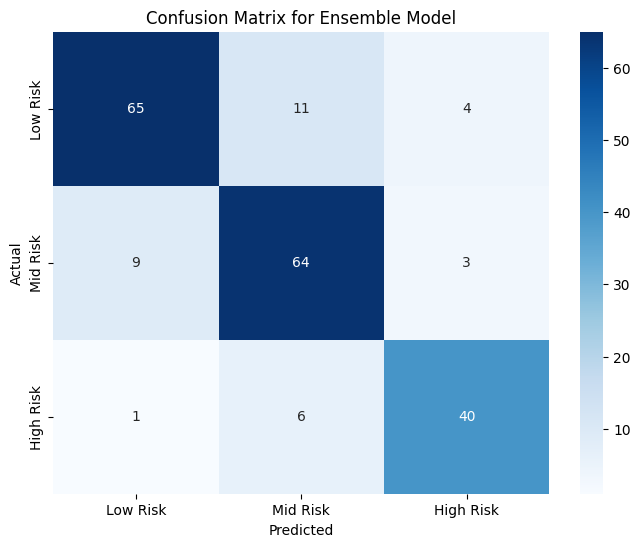

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Low Risk', 'Mid Risk', 'High Risk']

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


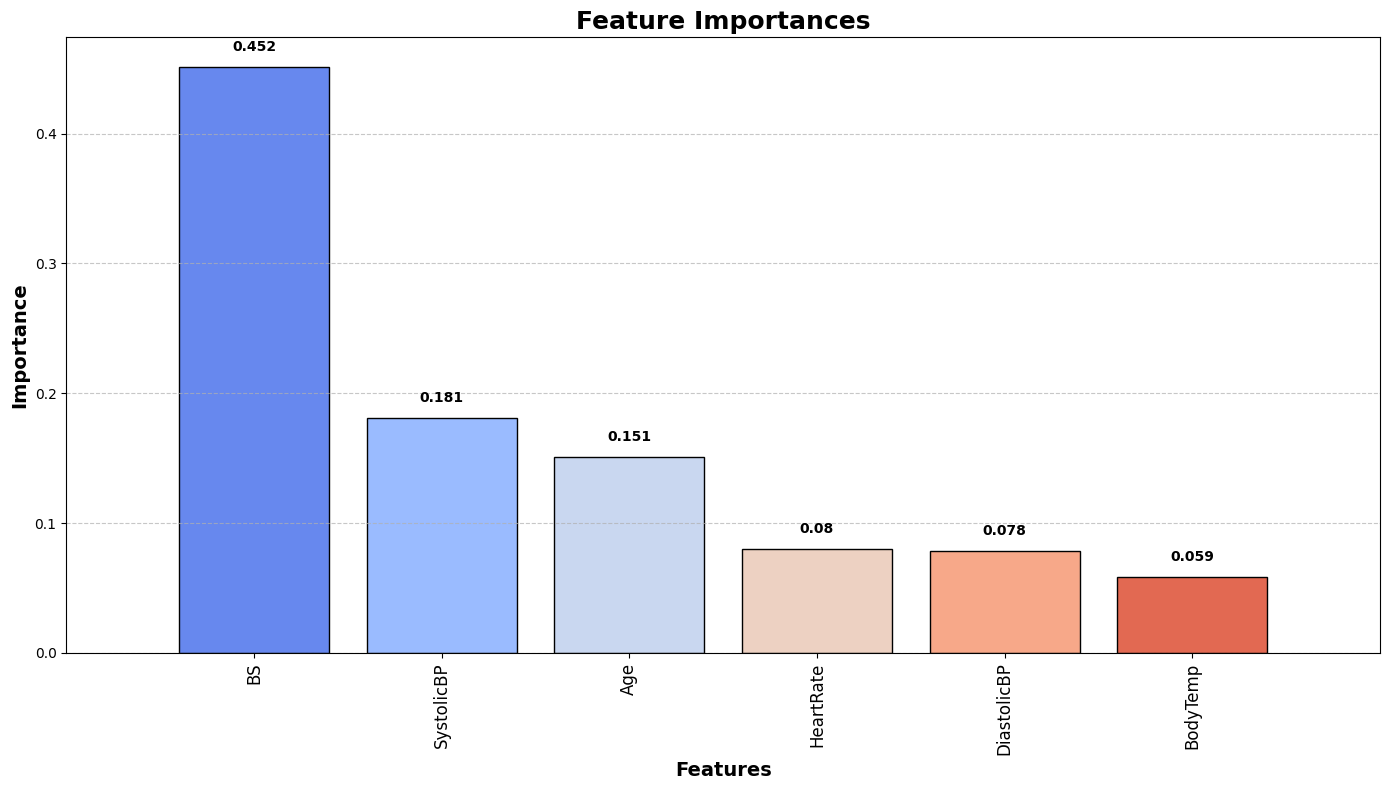

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming we have trained the Gradient Boosting model as part of the ensemble
# and used the same features in the ensemble
gb_model.fit(X_train, y_train)

# Get feature importances from the Gradient Boosting model
feature_importances = gb_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Create a color palette
palette = sns.color_palette("coolwarm", len(feature_importances))

# Plot the feature importances
plt.figure(figsize=(14, 8))
plt.title("Feature Importances", fontsize=18, fontweight='bold')
bars = plt.bar(range(X.shape[1]), feature_importances[indices], color=palette, edgecolor='black', align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90, fontsize=12)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Importance', fontsize=14, fontweight='bold')
plt.tight_layout()

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Model Stacking

The primary goal of stacking is to improve the predictive performance of our models by combining their outputs in a strategic manner. This involves training multiple first-level models (base models) and then using their predictions as inputs for a second-level model (meta model). The meta model learns to correct the weaknesses of the base models, resulting in a more accurate and reliable final prediction.
In our stacking implementation, we experiment with several meta models to determine which one provides the best performance for our specific task. The meta models we are evaluating include: Logistic Regression,Random Forest, Gradient Boosting and Support Vector Machine (SVM)

By comparing the performance of these meta models, we aim to identify the best configuration for our stacking ensemble. This thorough experimentation ensures that our final model is not only accurate but also generalizes well to new, unseen data, ultimately enhancing the prediction of maternal health risks.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define base models
base_models = [
    ('decision_tree', DecisionTreeClassifier(max_depth=17, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(
        learning_rate=0.12688548845044417,
        max_depth=9,
        min_samples_leaf=4,
        min_samples_split=8,
        n_estimators=238,
        random_state=42))
]

# Define the meta model
meta_model = LogisticRegression()

# Initialize and train the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Stacking Model Accuracy: {accuracy:.2f}')
print("\nStacking Model Confusion Matrix:")
print(conf_matrix)
print("\nStacking Model Classification Report:")
print(class_report)


Stacking Model Accuracy: 0.83

Stacking Model Confusion Matrix:
[[64 13  3]
 [ 9 64  3]
 [ 1  6 40]]

Stacking Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        80
           1       0.77      0.84      0.81        76
           2       0.87      0.85      0.86        47

    accuracy                           0.83       203
   macro avg       0.84      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203



In [ ]:
# Meta model examples
meta_model_lr = LogisticRegression()
meta_model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
meta_model_gb = GradientBoostingClassifier(n_estimators=50, random_state=42)
meta_model_svm = SVC(probability=True, random_state=42)

# Try different meta models
meta_models = [meta_model_lr, meta_model_rf, meta_model_gb, meta_model_svm]

for meta_model in meta_models:
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
    stacking_model.fit(X_train, y_train)
    y_pred = stacking_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Meta Model: {meta_model.__class__.__name__}, Accuracy: {accuracy:.2f}')


Meta Model: LogisticRegression, Accuracy: 0.83
Meta Model: RandomForestClassifier, Accuracy: 0.86
Meta Model: GradientBoostingClassifier, Accuracy: 0.88
Meta Model: SVC, Accuracy: 0.86


**Meta Model: Logistic Regression**

Accuracy: 0.83

Logistic Regression, a linear model, provided a solid baseline performance with an accuracy of 83%. This result demonstrates that even a simple linear model can effectively aggregate the outputs of the base models to improve predictive performance.

**Meta Model: Random Forest Classifier**

Accuracy: 0.86

The Random Forest meta model achieved a higher accuracy of 86%, indicating that it effectively captures more complex patterns and interactions in the data. Random Forest’s ability to reduce overfitting through averaging multiple decision trees contributed to this improved performance.

**Meta Model: Gradient Boosting Classifier**

Accuracy: 0.88

The Gradient Boosting meta model outperformed all others with an accuracy of 88%. This result suggests that Gradient Boosting’s iterative approach to correcting errors of previous models provides significant advantages in terms of accuracy. Its ability to handle complex, non-linear relationships in the data makes it a highly effective meta model for stacking.

**Meta Model: Support Vector Classifier (SVC)**

Accuracy: 0.86

The SVC meta model also achieved an accuracy of 86%, similar to the Random Forest. SVC is known for its robustness in high-dimensional spaces and its effectiveness in handling various classification tasks. Its performance here demonstrates its suitability as a meta model in capturing the complex decision boundaries required for accurate predictions.

**Summary**

The experimentation with different meta models revealed that the Gradient Boosting Classifier is the most effective meta model for our stacking ensemble, achieving the highest accuracy of 88%. The Random Forest and SVC also performed well, each with an accuracy of 86%, while the Logistic Regression provided a solid baseline performance with 83% accuracy. Based on these results, the Gradient Boosting meta model is the preferred choice, enhancing the overall prediction accuracy of maternal health risks and providing robust and reliable outcomes.

### Confusion Matrix

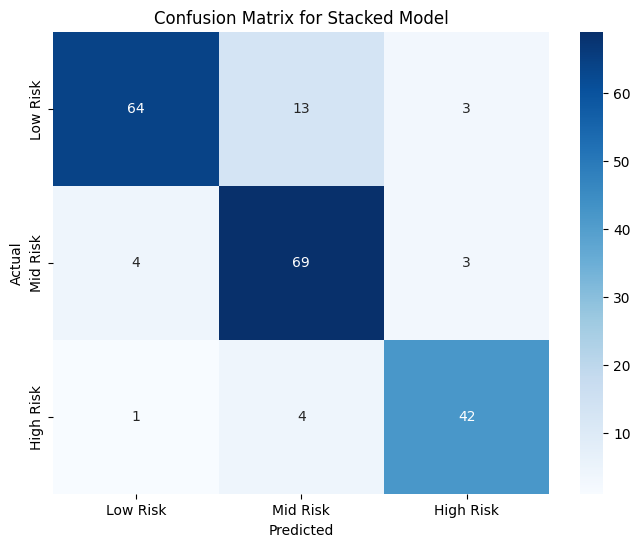

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set using the stacking model
y_pred_stacking = stacking_model.predict(X_test)

# Generate the confusion matrix
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

# Define class labels
class_labels = ['Low Risk', 'Mid Risk', 'High Risk']

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Stacked Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Feature Importance

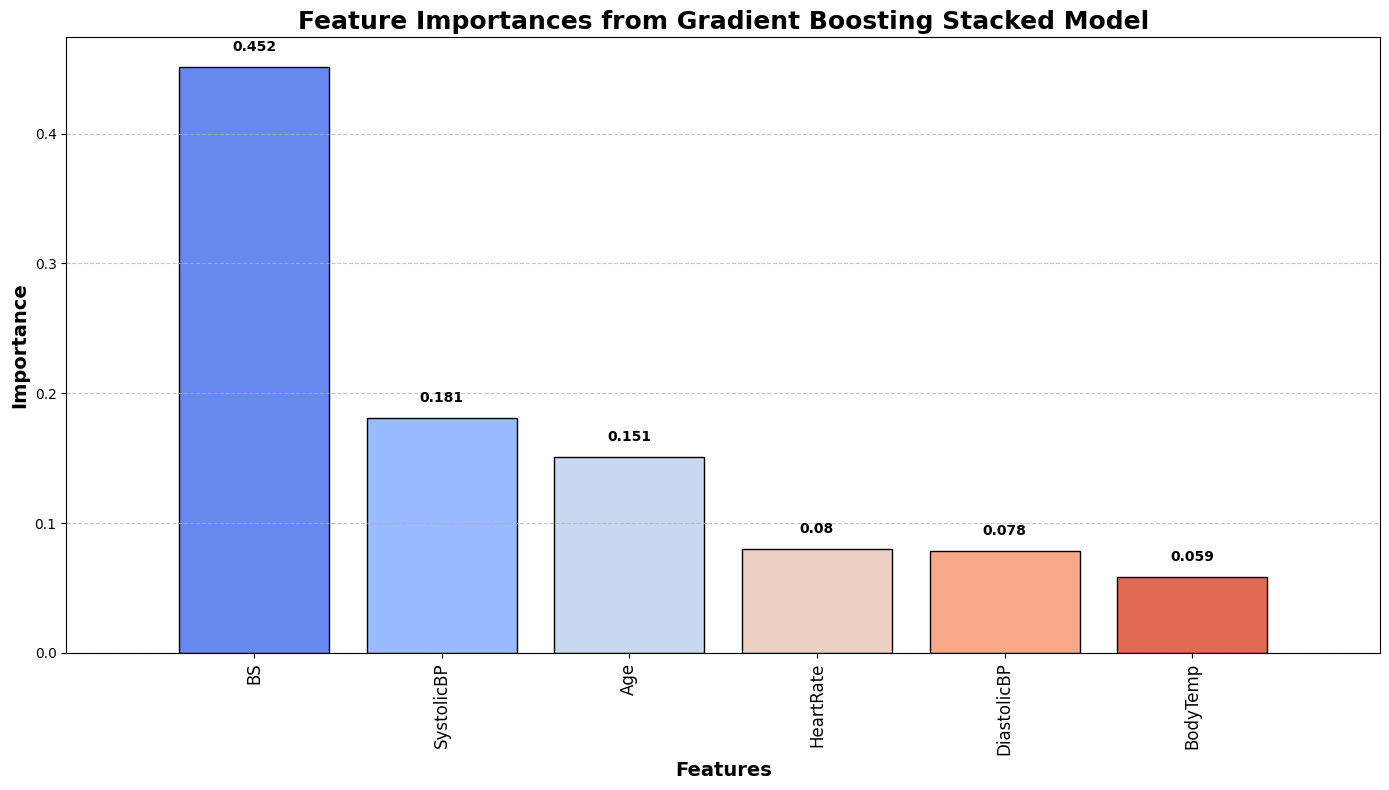

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the Gradient Boosting model
feature_importances = gb_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Create a color palette
palette = sns.color_palette("coolwarm", len(feature_importances))

# Plot the feature importances
plt.figure(figsize=(14, 8))
plt.title("Feature Importances from Gradient Boosting Stacked Model", fontsize=18, fontweight='bold')
bars = plt.bar(range(X.shape[1]), feature_importances[indices], color=palette, edgecolor='black', align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90, fontsize=12)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Importance', fontsize=14, fontweight='bold')
plt.tight_layout()

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Model Comparison

## Untuned Models

Model: Decision Tree
Accuracy: 0.82
Cross-Validation Score: 0.83
ROC-AUC Score: 0.93
Confusion Matrix:
[[64 13  3]
 [10 63  3]
 [ 1  6 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        80
           1       0.77      0.83      0.80        76
           2       0.87      0.85      0.86        47

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.82      0.82       203



Model: Random Forest
Accuracy: 0.81
Cross-Validation Score: 0.82
ROC-AUC Score: 0.95
Confusion Matrix:
[[61 16  3]
 [ 9 64  3]
 [ 1  6 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        80
           1       0.74      0.84      0.79        76
           2       0.87      0.85      0.86        47

    accuracy                           0.81       203
   macro avg       

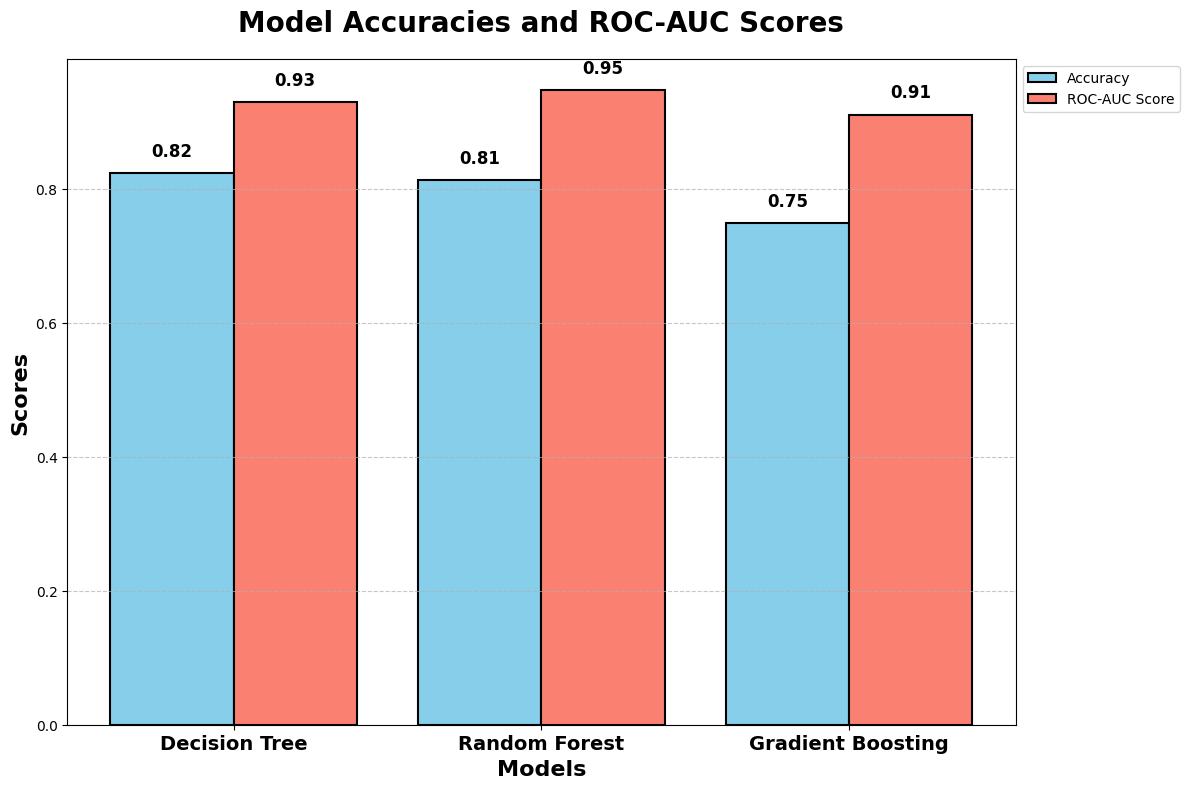

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the dataset has already been scaled and split into X_train, X_test, y_train, y_test

# Initialize the models
dt_model = DecisionTreeClassifier(max_depth=17, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
untuned_gb_model = GradientBoostingClassifier(random_state=42)

# List to store results
results = []

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # Calculate ROC-AUC score
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovo')
    else:
        y_decision = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_decision, multi_class='ovo')

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Cross-Validation Score': cv_scores.mean(),
        'ROC-AUC Score': roc_auc,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    })

# Evaluate each model
evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree')
evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')
evaluate_model(untuned_gb_model, X_train, X_test, y_train, y_test, 'Gradient Boosting')

# Print results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Cross-Validation Score: {result['Cross-Validation Score']:.2f}")
    print(f"ROC-AUC Score: {result['ROC-AUC Score']:.2f}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(result['Classification Report'])
    print("\n")

# Plotting accuracies and ROC-AUC scores
model_names = [result['Model'] for result in results]
accuracies = [result['Accuracy'] for result in results]
roc_auc_scores = [result['ROC-AUC Score'] for result in results]

x = np.arange(len(model_names))  # the label locations

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot accuracy
bars1 = ax1.bar(x - 0.2, accuracies, 0.4, label='Accuracy', color='skyblue', edgecolor='black', linewidth=1.5)

# Plot ROC-AUC score
bars2 = ax1.bar(x + 0.2, roc_auc_scores, 0.4, label='ROC-AUC Score', color='salmon', edgecolor='black', linewidth=1.5)

# Add some text for labels, title and axes ticks
ax1.set_xlabel('Models', fontsize=16, fontweight='bold')
ax1.set_ylabel('Scores', fontsize=16, fontweight='bold')
ax1.set_title('Model Accuracies and ROC-AUC Scores', fontsize=20, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjusting legend placement

# Adding value labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=12, fontweight='bold')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customizing the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


## Tuned Models

TBD

Model: Decision Tree
Accuracy: 0.82
Cross-Validation Score: 0.83
ROC-AUC Score: 0.93
Confusion Matrix:
[[64 13  3]
 [10 63  3]
 [ 1  6 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        80
           1       0.77      0.83      0.80        76
           2       0.87      0.85      0.86        47

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.82      0.82       203



Model: Random Forest
Accuracy: 0.81
Cross-Validation Score: 0.82
ROC-AUC Score: 0.95
Confusion Matrix:
[[61 16  3]
 [ 9 64  3]
 [ 1  6 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        80
           1       0.74      0.84      0.79        76
           2       0.87      0.85      0.86        47

    accuracy                           0.81       203
   macro avg       

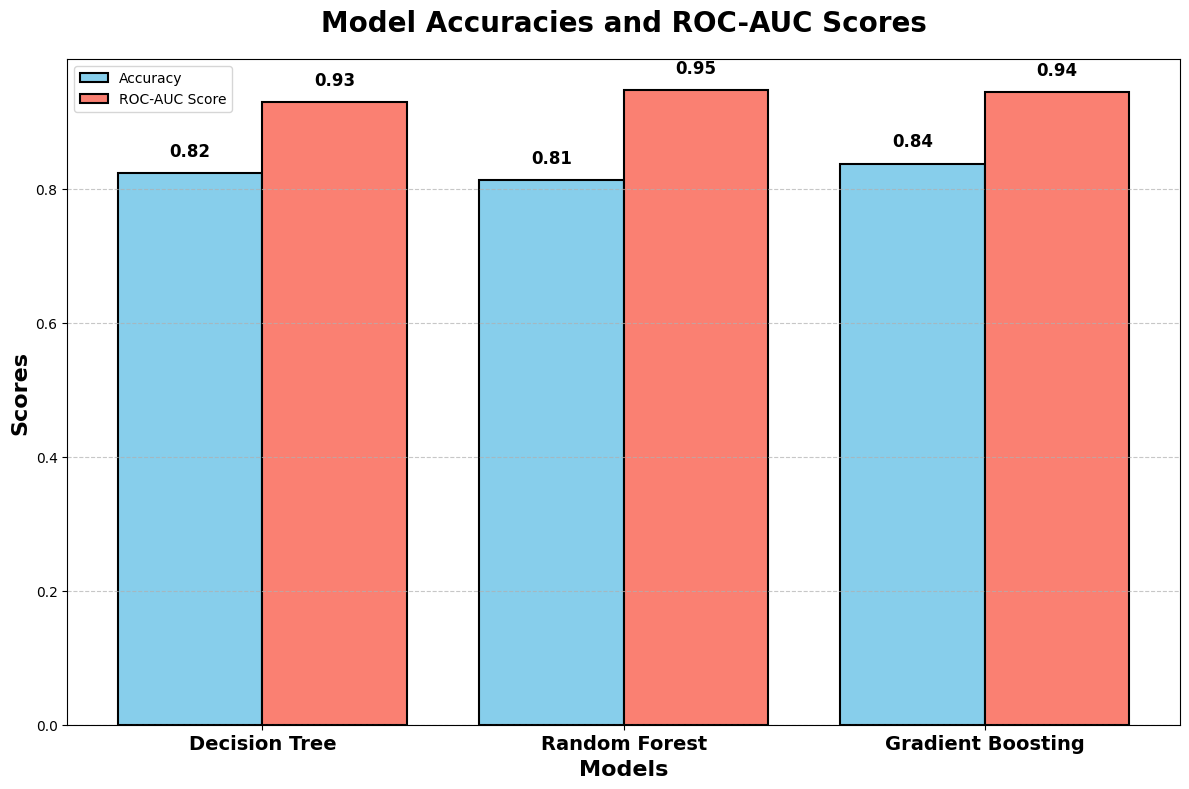

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the dataset has already been scaled and split into X_train, X_test, y_train, y_test

# Initialize the models
dt_model = DecisionTreeClassifier(max_depth=17, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(
    learning_rate=0.12688548845044417,
    max_depth=9,
    min_samples_leaf=4,
    min_samples_split=8,
    n_estimators=238,
    random_state=42
)

# List to store results
results = []

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # Calculate ROC-AUC score
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovo')
    else:
        y_decision = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_decision, multi_class='ovo')

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Cross-Validation Score': cv_scores.mean(),
        'ROC-AUC Score': roc_auc,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    })

# Evaluate each model
evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree')
evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')
evaluate_model(gb_model, X_train, X_test, y_train, y_test, 'Gradient Boosting')

# Print results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Cross-Validation Score: {result['Cross-Validation Score']:.2f}")
    print(f"ROC-AUC Score: {result['ROC-AUC Score']:.2f}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(result['Classification Report'])
    print("\n")

# Plotting accuracies and ROC-AUC scores
model_names = [result['Model'] for result in results]
accuracies = [result['Accuracy'] for result in results]
roc_auc_scores = [result['ROC-AUC Score'] for result in results]

x = np.arange(len(model_names))  # the label locations

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot accuracy
bars1 = ax1.bar(x - 0.2, accuracies, 0.4, label='Accuracy', color='skyblue', edgecolor='black', linewidth=1.5)

# Plot ROC-AUC score
bars2 = ax1.bar(x + 0.2, roc_auc_scores, 0.4, label='ROC-AUC Score', color='salmon', edgecolor='black', linewidth=1.5)

# Add some text for labels, title and axes ticks
ax1.set_xlabel('Models', fontsize=16, fontweight='bold')
ax1.set_ylabel('Scores', fontsize=16, fontweight='bold')
ax1.set_title('Model Accuracies and ROC-AUC Scores', fontsize=20, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, fontsize=14, fontweight='bold')
ax1.legend()

# Adding value labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=12, fontweight='bold')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customizing the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()
